## About the Topic
A backorder is an item that is not in stock at the moment. The customer can still order it, but delivery will only happen once the stock has been replenished. This is different from a situation when a product is labeled as being “out-of-stock” on the web platform which means the customer can’t order the product. However, backorders can still be placed despite the product not being in stock at a given moment in time. However, this causes a lot of additional inventory costs and wait for the customers, which is undesirable.

### Objective
The aim is to create a prediction model largely to identify whether items could be going out of stock or on backorder. This will help us to keep adequate or surplus stock of those products in order to meet demands of customers and not lose sales opportunities.

### Data Description
The list of all features and explanation of certain features (only unknown or technical jargons) in the features given the dataset have been provided below :

- **sku** : a stock keeping unit is a distinct type of item for sale, such as a product or service, and all attributes associated with the item type that distinguish it from other item types

- **national_inv**: The present national level of inventory of the product

- **lead_time** :  lead time in inventory management is the amount of time between when a purchase order is placed to replenish products and when the order is received in the warehouse. Order lead times can vary between suppliers; the more suppliers involved in the chain, the longer the lead time is likely to be.

- **in_transit_qty** : In transit inventory, also called transportation inventory or goods in transit, is any good shipped by a seller but not yet received by a buyer

- **forecast_3_month** : Forecasted sales of the product for the next 3 months.

- **forecast_6_month** : Forecasted sales of the product for the next 6 months.

- **forecast_9_month** : Forecasted sales of the product for the next 9 months.

- **sales_1_month** : Actual Sales of the product in the last 1 month.

- **sales_3_month** : Actual Sales of the product in the last 3 months.

- **sales_6_month** : Actual Sales of the product in the last 6 months.

- **sales_9_month** : Actual Sales of the product in the last 9 months.

- **min_bank**: Minimum amount of stock recommended to have.

- **potential_issue**: Any problem identified with the product or part.

- **pieces_past_due** : Assumption - The stock items that have been kept in stock for long time, past their expected life span.

- **perf_6_month_avg** : Average performance of product compared to expected performance in terms of units sold over last 6 months. [NOTE - true meaning of the feature is not clear or available. Assumption made based on values].

- **perf_12_month_avg**: Average performance of product compared to expected performance in terms of units sold over last 12 months. [NOTE - true meaning of the feature is not clear or available. Assumption made based on values].

- **local_bo_qty** : BO QTY in inventory managment refers to the Back Order Quantity. To find Back Order Quantity, divide the number of undeliverable orders by the total number of orders and multiply the result by 100.

- **deck_risk** : Assumption - It is the risk associated with keeping the items in stock and could relate to damage, shelf life, theft, etc. 
- oe_constraint
- **ppap_risk** : Short for Production Part Approval Process, it is a risk reduction process which is used as a risk classification and qualification process which is used to determine whether a production run will produce parts with consistency and repeatability. It is done prior to product release
- **stop_auto_buy** : Has the auto buy for the product, which was back ordered, cancelled.
- rev_stop

**TARGET FEATURE** : went_on_backorder - Whether an items was backordered or not

## NOTE - 

- The following codes were written in 3 different Amazon Sagemaker files and the final 3 notebooks were appended into 1.
- Some additional codes written like importing packages and dataset description at the start of each file have been removed for presentation purposes

### Initializing Logger

In [1]:
import logging

logging.basicConfig(filename = "Logging.txt",level=logging.INFO,filemode='a',format = '%(asctime)s %(levelname)s-%(message)s',datefmt='%Y-%m-%d %H:%M:%S')
logger = logging.getLogger()

### Importing the Pre-requisite Packages and Dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as exp
import warnings
warnings.filterwarnings('ignore')
logger.info("All pre-requisite packages imported")

In [3]:
data = pd.read_csv("Kaggle_Training_Dataset_v2.csv")
logger.info("Dataset Imported successfully")

## Data Understanding

In [4]:
data.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No


In [5]:
data.columns

Index(['sku', 'national_inv', 'lead_time', 'in_transit_qty',
       'forecast_3_month', 'forecast_6_month', 'forecast_9_month',
       'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month',
       'min_bank', 'potential_issue', 'pieces_past_due', 'perf_6_month_avg',
       'perf_12_month_avg', 'local_bo_qty', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder'],
      dtype='object')

In [6]:
data[['lead_time', 'in_transit_qty','forecast_6_month', 'sales_6_month','pieces_past_due', 'perf_6_month_avg', 'oe_constraint','ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder']]

,lead_time,in_transit_qty,forecast_6_month,sales_6_month,pieces_past_due,perf_6_month_avg,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,NaN,0.0,0.0,0.0,0.0,-99.00,No,No,Yes,No,No
1,9.0,0.0,0.0,0.0,0.0,0.99,No,No,Yes,No,No
2,NaN,0.0,0.0,0.0,0.0,-99.00,No,No,Yes,No,No
3,8.0,0.0,0.0,0.0,0.0,0.10,No,No,Yes,No,No
4,NaN,0.0,0.0,0.0,0.0,-99.00,No,No,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...
1687856,NaN,0.0,7.0,3.0,0.0,-99.00,No,No,Yes,No,No
1687857,9.0,0.0,9.0,11.0,0.0,0.86,No,No,No,No,Yes
1687858,9.0,16.0,87.0,153.0,0.0,0.86,No,No,Yes,No,No
1687859,4.0,0.0,0.0,12.0,0.0,0.73,No,No,Yes,No,No


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687861 entries, 0 to 1687860
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   sku                1687861 non-null  object 
 1   national_inv       1687860 non-null  float64
 2   lead_time          1586967 non-null  float64
 3   in_transit_qty     1687860 non-null  float64
 4   forecast_3_month   1687860 non-null  float64
 5   forecast_6_month   1687860 non-null  float64
 6   forecast_9_month   1687860 non-null  float64
 7   sales_1_month      1687860 non-null  float64
 8   sales_3_month      1687860 non-null  float64
 9   sales_6_month      1687860 non-null  float64
 10  sales_9_month      1687860 non-null  float64
 11  min_bank           1687860 non-null  float64
 12  potential_issue    1687860 non-null  object 
 13  pieces_past_due    1687860 non-null  float64
 14  perf_6_month_avg   1687860 non-null  float64
 15  perf_12_month_avg  1687860 non-n

In [8]:
data.select_dtypes(include=np.number).columns

Index(['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month',
       'forecast_6_month', 'forecast_9_month', 'sales_1_month',
       'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank',
       'pieces_past_due', 'perf_6_month_avg', 'perf_12_month_avg',
       'local_bo_qty'],
      dtype='object')

In [9]:
len(data.select_dtypes(include=np.number).columns)

15

In [10]:
data.select_dtypes(include=np.number).head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-99.00,-99.00,0.0
1,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.99,0.99,0.0
2,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-99.00,-99.00,0.0
3,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.10,0.13,0.0
4,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0.0,-99.00,-99.00,0.0


In [11]:
data.select_dtypes(exclude=np.number).columns

Index(['sku', 'potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk',
       'stop_auto_buy', 'rev_stop', 'went_on_backorder'],
      dtype='object')

In [12]:
len(data.select_dtypes(exclude=np.number).columns)

8

In [13]:
data.select_dtypes(exclude=np.number).head()

,sku,potential_issue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,No,No,No,No,Yes,No,No
1,1043384,No,No,No,No,Yes,No,No
2,1043696,No,Yes,No,No,Yes,No,No
3,1043852,No,No,No,No,Yes,No,No
4,1044048,No,Yes,No,No,Yes,No,No


In [14]:
data.nunique()

sku                  1687861
national_inv           14969
lead_time                 32
in_transit_qty          5230
forecast_3_month        7825
forecast_6_month       11114
forecast_9_month       13662
sales_1_month           5764
sales_3_month          10495
sales_6_month          14818
sales_9_month          18341
min_bank                5568
potential_issue            2
pieces_past_due          826
perf_6_month_avg         102
perf_12_month_avg        102
local_bo_qty             654
deck_risk                  2
oe_constraint              2
ppap_risk                  2
stop_auto_buy              2
rev_stop                   2
went_on_backorder          2
dtype: int64

In [15]:
data.nunique() / len(data) * 100

sku                  100.000000
national_inv           0.886862
lead_time              0.001896
in_transit_qty         0.309860
forecast_3_month       0.463605
forecast_6_month       0.658467
forecast_9_month       0.809427
sales_1_month          0.341497
sales_3_month          0.621793
sales_6_month          0.877916
sales_9_month          1.086642
min_bank               0.329885
potential_issue        0.000118
pieces_past_due        0.048938
perf_6_month_avg       0.006043
perf_12_month_avg      0.006043
local_bo_qty           0.038747
deck_risk              0.000118
oe_constraint          0.000118
ppap_risk              0.000118
stop_auto_buy          0.000118
rev_stop               0.000118
went_on_backorder      0.000118
dtype: float64

In [16]:
data.isnull().sum()

sku                       0
national_inv              1
lead_time            100894
in_transit_qty            1
forecast_3_month          1
forecast_6_month          1
forecast_9_month          1
sales_1_month             1
sales_3_month             1
sales_6_month             1
sales_9_month             1
min_bank                  1
potential_issue           1
pieces_past_due           1
perf_6_month_avg          1
perf_12_month_avg         1
local_bo_qty              1
deck_risk                 1
oe_constraint             1
ppap_risk                 1
stop_auto_buy             1
rev_stop                  1
went_on_backorder         1
dtype: int64

In [17]:
data.isnull().sum() / len(data) * 100

sku                  0.000000
national_inv         0.000059
lead_time            5.977625
in_transit_qty       0.000059
forecast_3_month     0.000059
forecast_6_month     0.000059
forecast_9_month     0.000059
sales_1_month        0.000059
sales_3_month        0.000059
sales_6_month        0.000059
sales_9_month        0.000059
min_bank             0.000059
potential_issue      0.000059
pieces_past_due      0.000059
perf_6_month_avg     0.000059
perf_12_month_avg    0.000059
local_bo_qty         0.000059
deck_risk            0.000059
oe_constraint        0.000059
ppap_risk            0.000059
stop_auto_buy        0.000059
rev_stop             0.000059
went_on_backorder    0.000059
dtype: float64

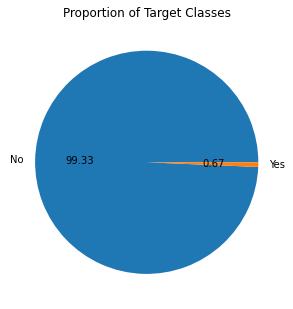

In [18]:
plt.figure(figsize=(5,6))
proportions = data.went_on_backorder.value_counts(1)*100
labels = data.went_on_backorder.value_counts(1).index
plt.pie(x=proportions,labels=labels,autopct="%.2f")
plt.title("Proportion of Target Classes")
plt.show()

### Observations - 
- In total, there are 23 variables, of which 15 are numerical and 8 are categorical
- All the numerical features are continous in nature.
- sku is unique for each record as it helps to identify each item uniquely.
- In terms of missing values, we can see that in all variables except sku, there is 1 missing value. This record can be dropped.
- Only lead time has more than 1 missing values. It has close to 6% missing values.
- Also, based on the proportion of target classes, with more than 99% of data being for "No" class, we can say that our data is heavily imbalanced.

## Data Cleaning

In [19]:
logger.info("Data Cleaning Started")

In [20]:
for i in data.columns:
    if i == i.strip():
        print(f"{i} has no trailing space","",sep="\n")
    else:
        print(f"{i} has trailing space","",sep="\n")
logger.info("Trailing spaces in column names checked")

sku has no trailing space

national_inv has no trailing space

lead_time has no trailing space

in_transit_qty has no trailing space

forecast_3_month has no trailing space

forecast_6_month has no trailing space

forecast_9_month has no trailing space

sales_1_month has no trailing space

sales_3_month has no trailing space

sales_6_month has no trailing space

sales_9_month has no trailing space

min_bank has no trailing space

potential_issue has no trailing space

pieces_past_due has no trailing space

perf_6_month_avg has no trailing space

perf_12_month_avg has no trailing space

local_bo_qty has no trailing space

deck_risk has no trailing space

oe_constraint has no trailing space

ppap_risk has no trailing space

stop_auto_buy has no trailing space

rev_stop has no trailing space

went_on_backorder has no trailing space



In [21]:
## This is the record with values for all variables missing. Hence it will be dropped
data.drop("sku",axis=1)[(data.drop("sku",axis=1).isnull()).all(axis=1)].index

Int64Index([1687860], dtype='int64')

In [22]:
data.drop(1687860,inplace=True)
logger.info("Records no. 1687860 being dropped due to being total empty")

In [23]:
for i in data.select_dtypes(include=np.object).columns[1:]:
    print(i,":",data[i].unique())
logger.info("Unique values in categorical features checked")

potential_issue : ['No' 'Yes']
deck_risk : ['No' 'Yes']
oe_constraint : ['No' 'Yes']
ppap_risk : ['No' 'Yes']
stop_auto_buy : ['Yes' 'No']
rev_stop : ['No' 'Yes']
went_on_backorder : ['No' 'Yes']


#### Observations - 

- None of the columns names have any trailing space.
- All the categorical features have 2 unique values i.e Yes and No, which look alright.
- The one records with all values missing has been dropped.

In [24]:
logger.info("Data Cleaning complete")

## Exploratory Data Analysis

### Univariate Analysis

In [25]:
logger.info("Exploratory Data Analysis Started")
logger.info("Part 1: Univariate Analysis")

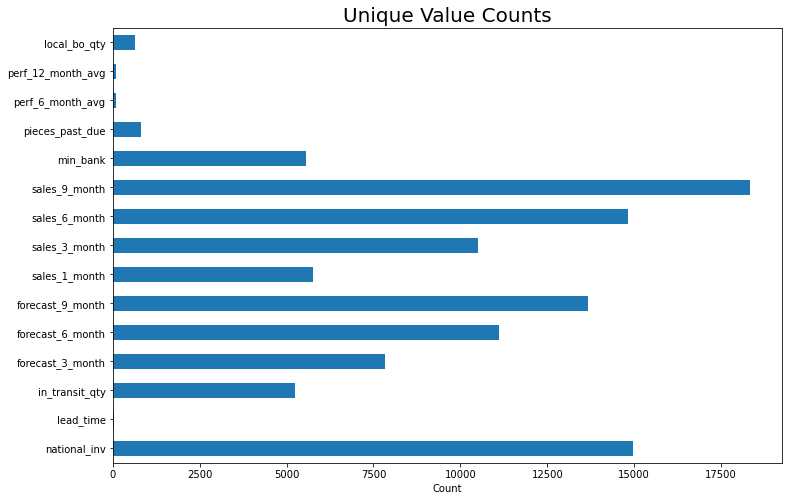

In [26]:
plt.figure(figsize=(12,8))
data.select_dtypes(include=np.number).nunique().plot(kind="barh")
plt.title("Unique Value Counts",size=20)
plt.xlabel("Count")
plt.show()

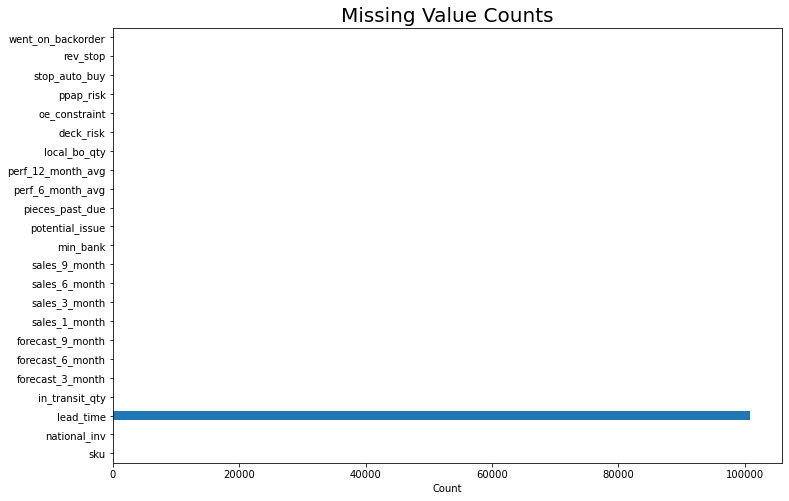

In [27]:
plt.figure(figsize=(12,8))
data.isnull().sum().plot(kind="barh")
plt.title("Missing Value Counts",size=20)
plt.xlabel("Count")
plt.show()

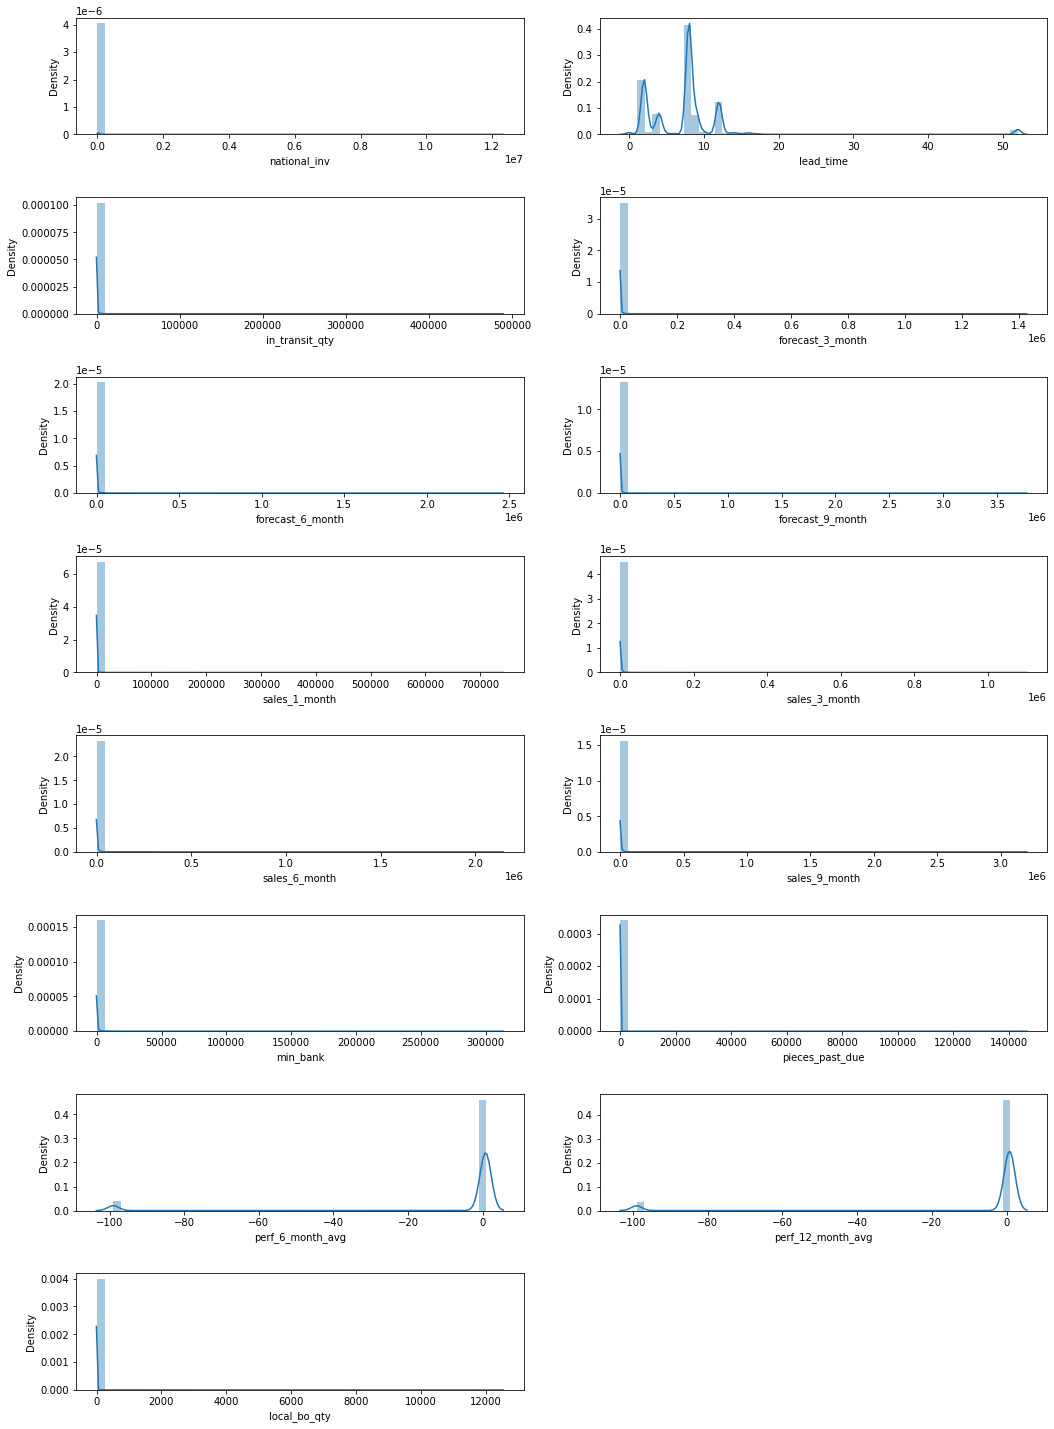

In [28]:
plt.figure(figsize=(15,20))
for index,col in enumerate(data.select_dtypes(include=np.number).columns):
    plt.subplot(8,2,index+1)
    plt.tight_layout(pad=2,h_pad=2)
    sns.distplot(data[col])

In [29]:
data.skew()

sku                    0.401787
national_inv         340.285800
lead_time              4.556295
in_transit_qty       166.183404
forecast_3_month     138.968325
forecast_6_month     138.961427
forecast_9_month     143.298875
sales_1_month        196.119990
sales_3_month        141.286380
sales_6_month        139.176712
sales_9_month        135.054191
min_bank             131.212649
pieces_past_due      412.391900
perf_6_month_avg      -3.180622
perf_12_month_avg     -3.302181
local_bo_qty         165.190548
dtype: float64

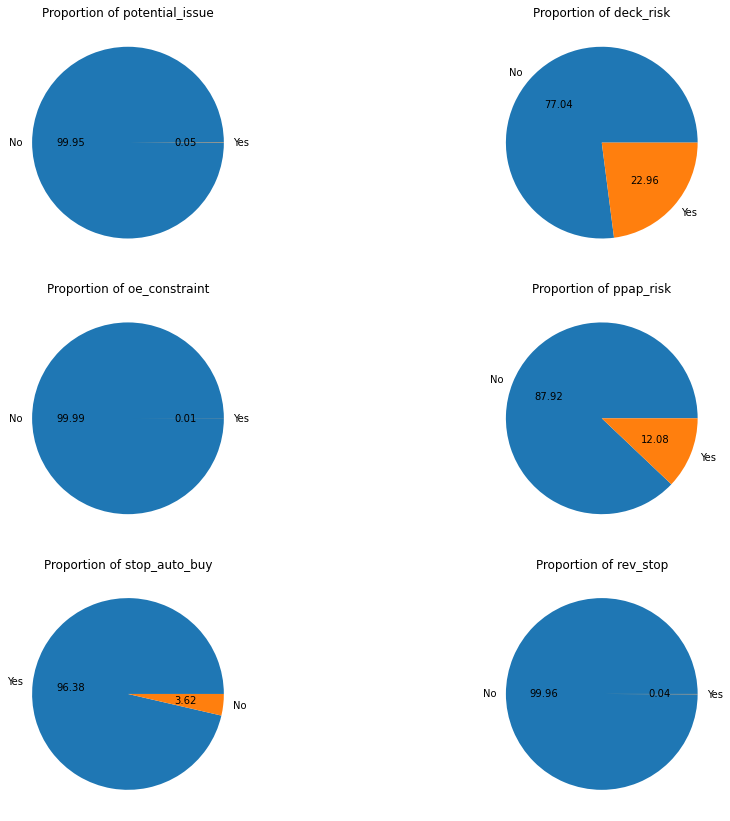

In [30]:
plt.figure(figsize=(15,12))
for index,col in enumerate(data.select_dtypes(exclude=np.number).columns[1:-1]):
    plt.subplot(3,2,index+1)
    plt.tight_layout(pad=2,h_pad=2)
    proportions = data[col].value_counts(1)*100
    labels = data[col].value_counts(1).index
    plt.pie(x=proportions,labels=labels,autopct="%.2f")
    plt.title(f"Proportion of {col}")

#### Observations - 

- Within numerical features, majority of columns are have large no. of unique values, indicating large amount of variance, which will be good for analysis and models.
- In terms of missing values, only lead time has missing values, which total upto around 100K.
- In terms of distributions of the numerical features, all the features have huge amount of positive skewness, indicated by long extended tails to right of distribution plots and also by 3 digit skewness values.
- We observe that out of 6 categorical features, 4 features i.e potential risk, oe constraint, rev stop and stop auto buy have distribution of categories which is very skewed i.e % of "No" is more than 95%. 
- This distribution in cateogories is due to the imbalance in the dataset.

### Bi-Variate Analysis

In [31]:
logger.info("Part 2: Bi-variate Analysis")

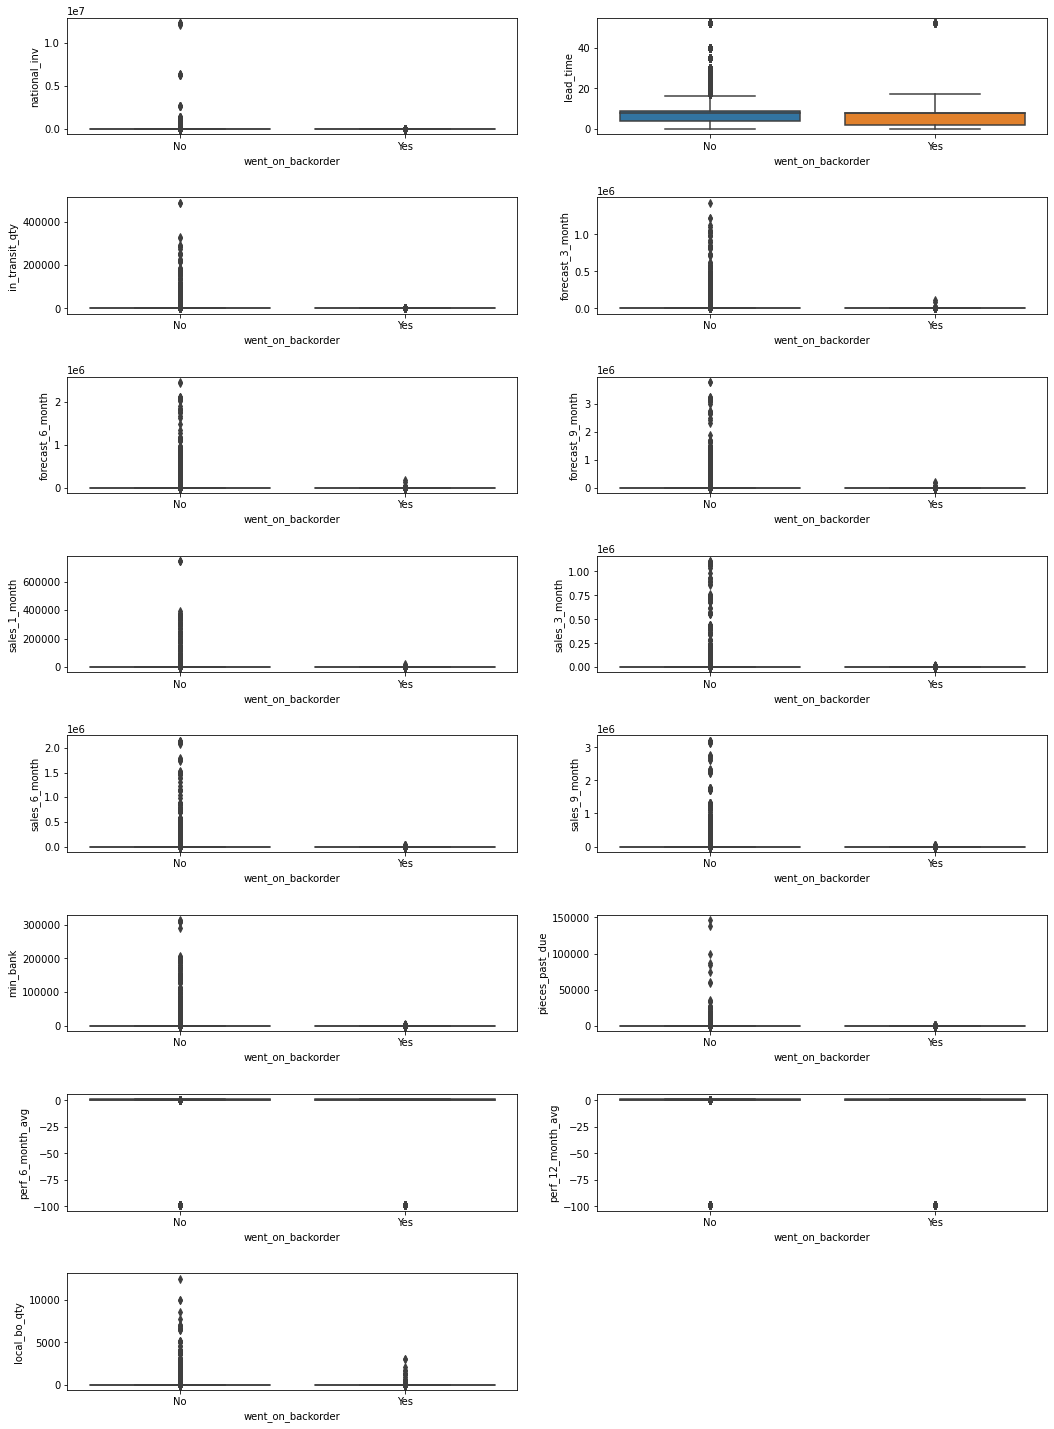

In [32]:
plt.figure(figsize=(15,20))
for index,col in enumerate(data.select_dtypes(include=np.number).columns):
    plt.subplot(8,2,index+1)
    plt.tight_layout(pad=2,h_pad=2)
    sns.boxplot(y=data[col],x=data.went_on_backorder)

In [33]:
for col in data.select_dtypes(include=np.number).columns:
    print(col)
    print(data.groupby("went_on_backorder")[col].median())
    print()
   

national_inv
went_on_backorder
No     15.0
Yes     1.0
Name: national_inv, dtype: float64

lead_time
went_on_backorder
No     8.0
Yes    8.0
Name: lead_time, dtype: float64

in_transit_qty
went_on_backorder
No     0.0
Yes    0.0
Name: in_transit_qty, dtype: float64

forecast_3_month
went_on_backorder
No      0.0
Yes    12.0
Name: forecast_3_month, dtype: float64

forecast_6_month
went_on_backorder
No      0.0
Yes    19.0
Name: forecast_6_month, dtype: float64

forecast_9_month
went_on_backorder
No      0.0
Yes    24.0
Name: forecast_9_month, dtype: float64

sales_1_month
went_on_backorder
No     0.0
Yes    3.0
Name: sales_1_month, dtype: float64

sales_3_month
went_on_backorder
No     1.0
Yes    8.0
Name: sales_3_month, dtype: float64

sales_6_month
went_on_backorder
No      2.0
Yes    14.0
Name: sales_6_month, dtype: float64

sales_9_month
went_on_backorder
No      4.0
Yes    19.0
Name: sales_9_month, dtype: float64

min_bank
went_on_backorder
No     0.0
Yes    0.0
Name: min_bank, dty

In [34]:
import scipy.stats as stats

In [35]:
for col in data.select_dtypes(include=np.number).columns:
    print(col)
    print(stats.mannwhitneyu(data[data.went_on_backorder=="Yes"][col],data[data.went_on_backorder=="No"][col])[1])
    print()
   

national_inv
0.0

lead_time
2.1123370536440789e-215

in_transit_qty
2.7893561764443105e-111

forecast_3_month
0.0

forecast_6_month
0.0

forecast_9_month
0.0

sales_1_month
0.0

sales_3_month
0.0

sales_6_month
0.0

sales_9_month
0.0

min_bank
0.02455040869873347

pieces_past_due
0.0

perf_6_month_avg
6.552852288212608e-66

perf_12_month_avg
4.192338623136861e-75

local_bo_qty
0.0



In [36]:
for col in data.select_dtypes(include=np.number).columns:
    print(col)
    print(stats.ttest_ind(data[data.went_on_backorder=="Yes"][col],data[data.went_on_backorder=="No"][col])[1])
    print()
   

national_inv
0.08744713324701338

lead_time
nan

in_transit_qty
0.0016126635962829929

forecast_3_month
0.6589779635127829

forecast_6_month
0.2748740297076927

forecast_9_month
0.18092018870352136

sales_1_month
0.14188456746073766

sales_3_month
0.049449359643634304

sales_6_month
0.024730382181077277

sales_9_month
0.021936631424358873

min_bank
0.015271347350611569

pieces_past_due
0.5025473532890707

perf_6_month_avg
5.6365183895106e-52

perf_12_month_avg
2.863087863078559e-51

local_bo_qty
5.040913896288599e-35



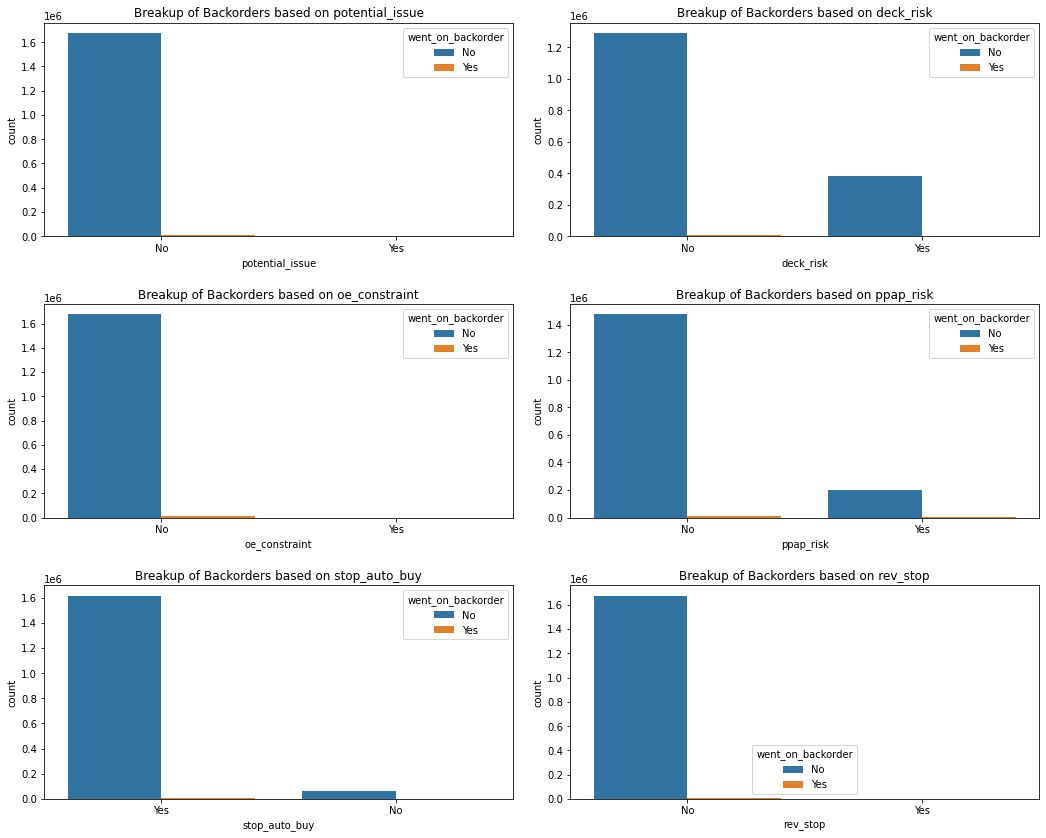

In [37]:
plt.figure(figsize=(15,12))
for index,col in enumerate(data.select_dtypes(exclude=np.number).columns[1:-1]):
    plt.subplot(3,2,index+1)
    plt.tight_layout(pad=2,h_pad=2)
    sns.countplot(x=data[col],hue=data.went_on_backorder)
    plt.title(f"Breakup of Backorders based on {col}",size=12)

In [38]:
pd.crosstab(index=data.went_on_backorder,columns=data.potential_issue,normalize=True,margins=True) * 100

potential_issue,No,Yes,All
went_on_backorder,,,
No,99.280213,0.050715,99.330928
Yes,0.666051,0.003022,0.669072
All,99.946263,0.053737,100.000000


In [39]:
pd.crosstab(index=data.went_on_backorder,columns=data.deck_risk,normalize=True,margins=True) * 100

deck_risk,No,Yes,All
went_on_backorder,,,
No,76.487386,22.843542,99.330928
Yes,0.555556,0.113517,0.669072
All,77.042942,22.957058,100.000000


In [40]:
pd.crosstab(index=data.went_on_backorder,columns=data.oe_constraint,normalize=True,margins=True) * 100

oe_constraint,No,Yes,All
went_on_backorder,,,
No,99.316886,0.014041,99.330928
Yes,0.668598,0.000474,0.669072
All,99.985485,0.014515,100.000000


In [41]:
pd.crosstab(index=data.went_on_backorder,columns=data.ppap_risk,normalize=True,margins=True) * 100

ppap_risk,No,Yes,All
went_on_backorder,,,
No,87.358667,11.972261,99.330928
Yes,0.564857,0.104215,0.669072
All,87.923524,12.076476,100.000000


In [42]:
pd.crosstab(index=data.went_on_backorder,columns=data.stop_auto_buy,normalize=True,margins=True) * 100

stop_auto_buy,No,Yes,All
went_on_backorder,,,
No,3.591234,95.739694,99.330928
Yes,0.027905,0.641167,0.669072
All,3.619139,96.380861,100.000000


In [43]:
pd.crosstab(index=data.went_on_backorder,columns=data.rev_stop,normalize=True,margins=True) * 100

rev_stop,No,Yes,All
went_on_backorder,,,
No,99.287619,0.043309,99.330928
Yes,0.669072,0.000000,0.669072
All,99.956691,0.043309,100.000000


In [44]:
stats.chi2_contingency(pd.crosstab(data.went_on_backorder,data["deck_risk"]))[1]

4.981380770364453e-52

In [45]:
for col in data.select_dtypes(exclude=np.number).columns[1:-1]:
    print(col)
    print("p value of chi square:",stats.chi2_contingency(pd.crosstab(data.went_on_backorder,data[col]))[1])
    print()
   

potential_issue
p value of chi square: 3.0754846573427014e-73

deck_risk
p value of chi square: 4.981380770364453e-52

oe_constraint
p value of chi square: 4.362933706176436e-06

ppap_risk
p value of chi square: 2.7404638447902615e-30

stop_auto_buy
p value of chi square: 0.0017855596321260765

rev_stop
p value of chi square: 0.04630940389527151



Text(0.5, 1.0, 'Lead Time for backorders')

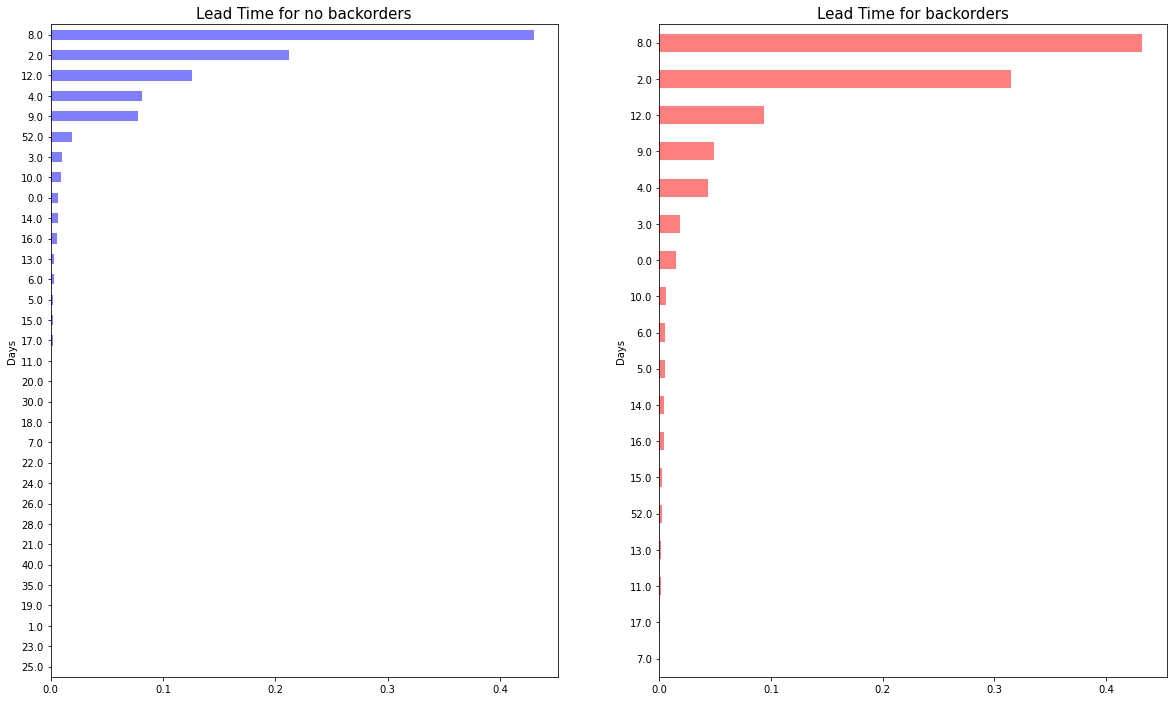

In [46]:
plt.figure(figsize=(20,12))
plt.subplot(1,2,1)
(data[data.went_on_backorder=="No"].lead_time.value_counts(1).sort_values(ascending=True)).plot(kind="barh",color="blue",alpha=0.5)
plt.ylabel("Days")
plt.title("Lead Time for no backorders",size=15)

plt.subplot(1,2,2)
(data[data.went_on_backorder=="Yes"].lead_time.value_counts(1).sort_values(ascending=True)).plot(kind="barh",color="red",alpha=0.5)
plt.ylabel("Days")
plt.title("Lead Time for backorders",size=15)

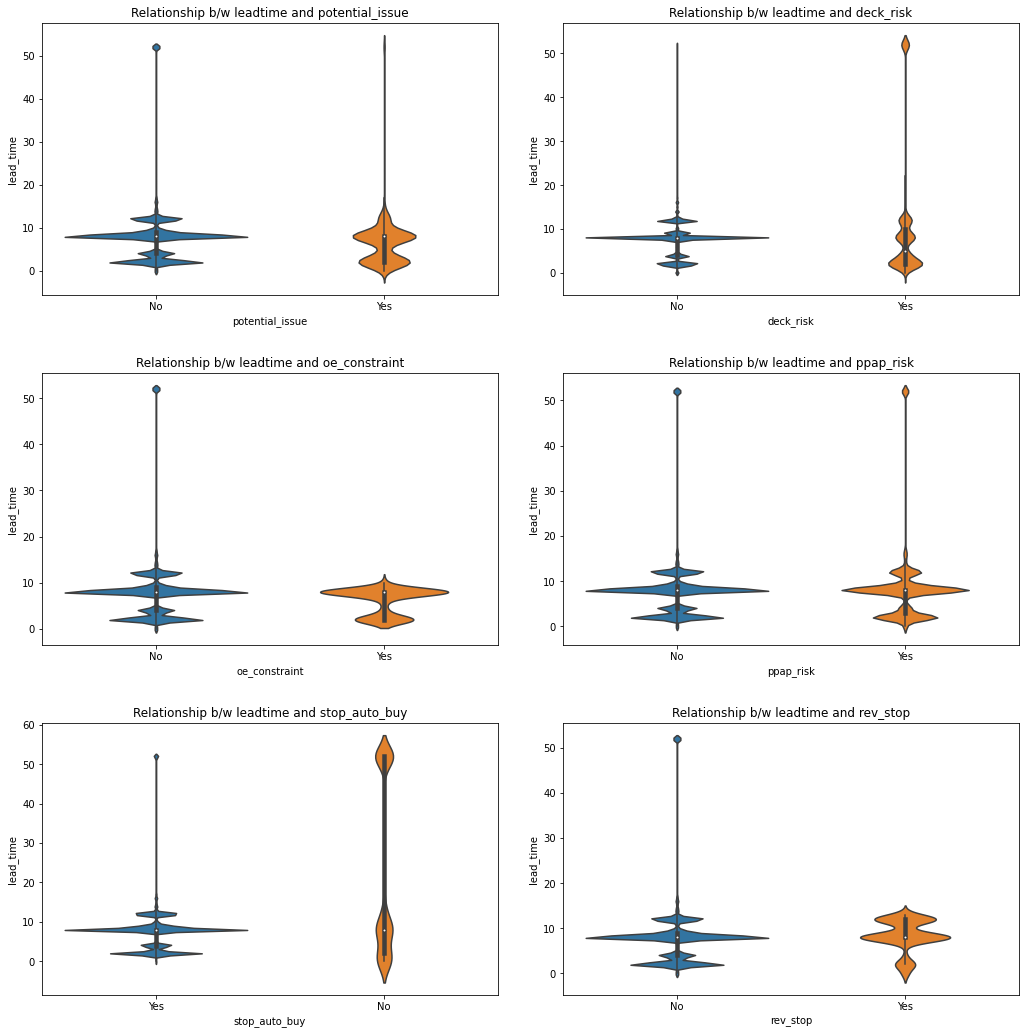

In [47]:

plt.figure(figsize=(15,15))
for index,i in enumerate(data.select_dtypes(include=np.object).columns[1:-1]):
    plt.subplot(3,2,index+1)
    plt.tight_layout(pad=3,h_pad=3)
    sns.violinplot(x=data[i],y=data.lead_time)
    plt.title(f"Relationship b/w leadtime and {i}")

In [48]:
for index,i in enumerate(data.select_dtypes(include=np.object).columns[1:-1]):
    print(data.groupby(i)["lead_time"].median())
    print()

potential_issue
No     8.0
Yes    8.0
Name: lead_time, dtype: float64

deck_risk
No     8.0
Yes    5.0
Name: lead_time, dtype: float64

oe_constraint
No     8.0
Yes    8.0
Name: lead_time, dtype: float64

ppap_risk
No     8.0
Yes    8.0
Name: lead_time, dtype: float64

stop_auto_buy
No     8.0
Yes    8.0
Name: lead_time, dtype: float64

rev_stop
No     8.0
Yes    8.0
Name: lead_time, dtype: float64



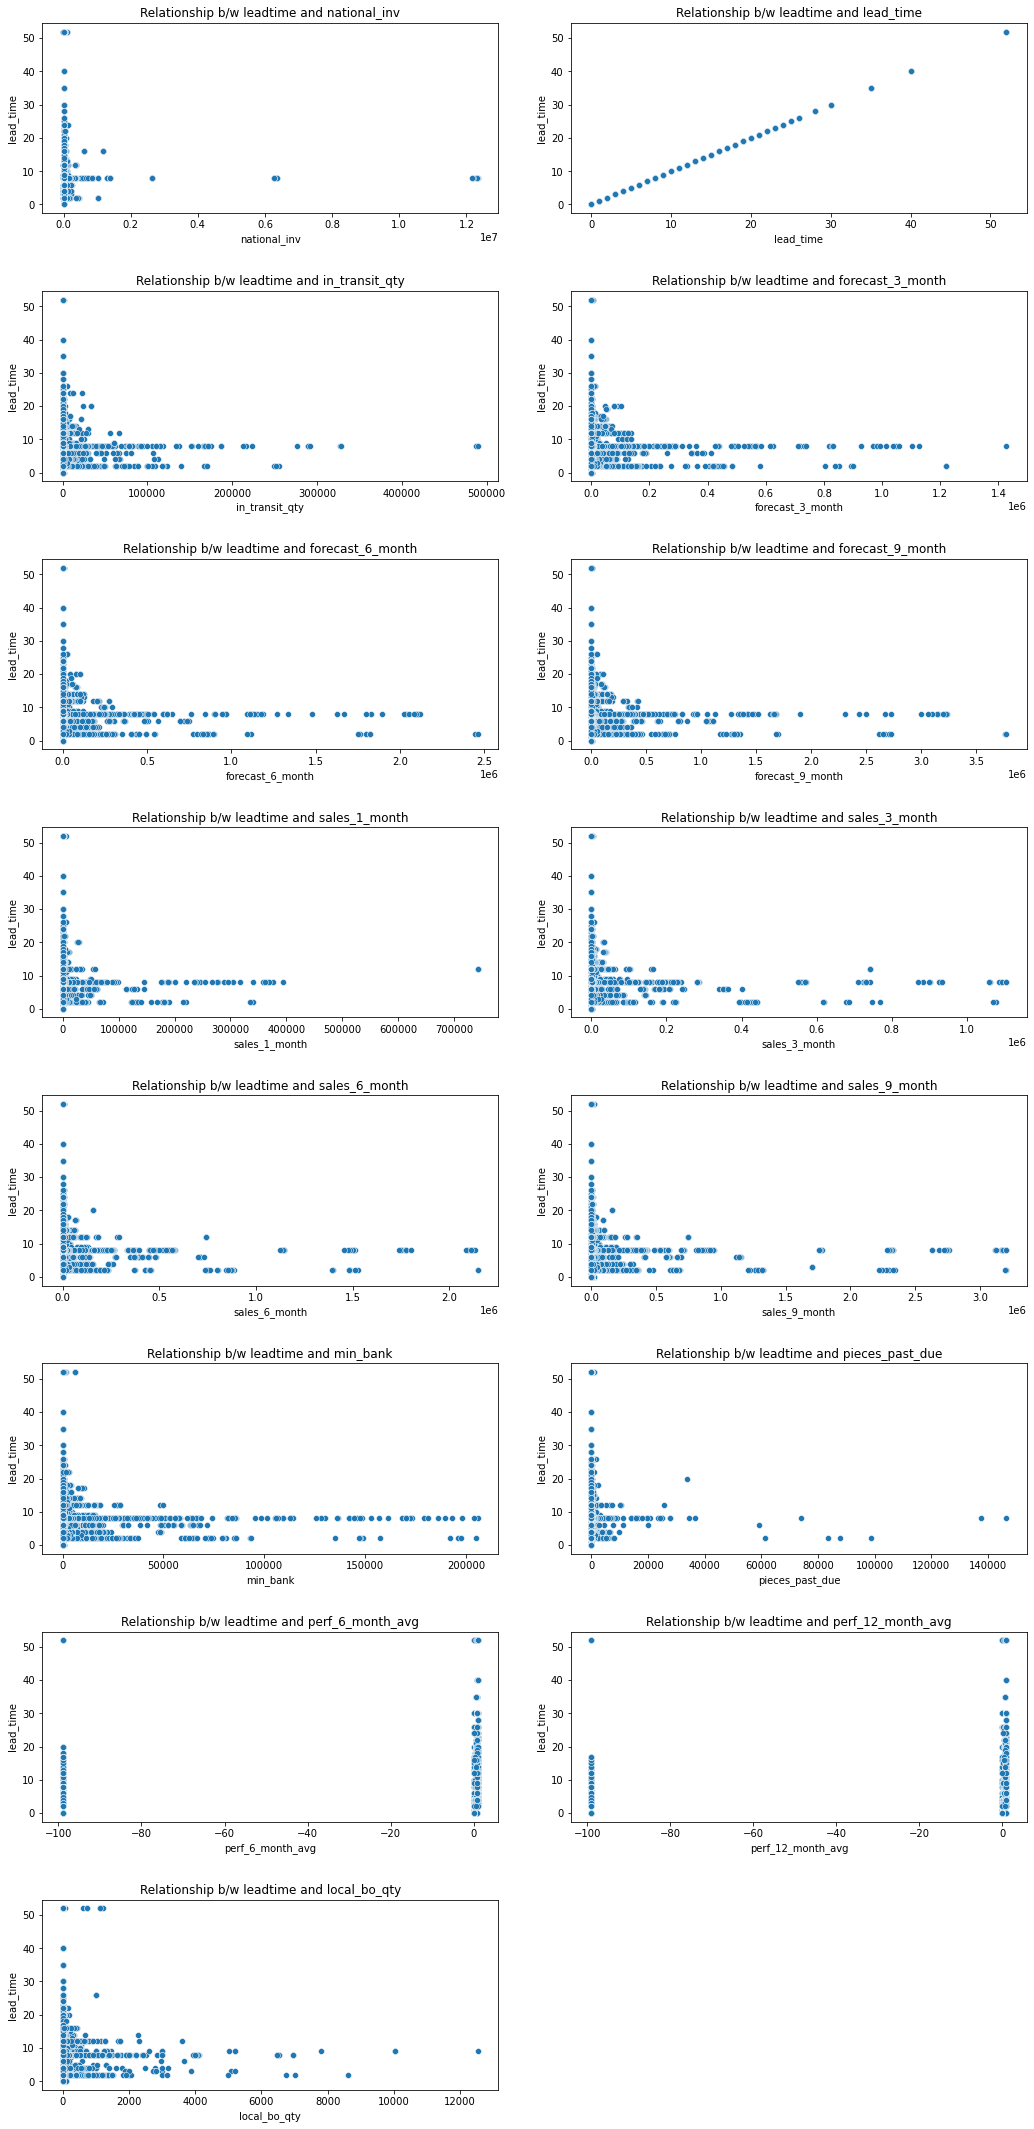

In [49]:
plt.figure(figsize=(15,30))
for index,i in enumerate(data.select_dtypes(include=np.number).columns):
    plt.subplot(8,2,index+1)
    plt.tight_layout(pad=3,h_pad=3)
    sns.scatterplot(x=data[i],y=data.lead_time)
    plt.title(f"Relationship b/w leadtime and {i}")

#### Observations - 

- In terms of the numerical features, based on analyzing relationship between independent features and predicted feature i.e went on backorder, we observed that majority of features show a very significant pattern and help in seperating back orders from none backorders.
- Since the numerical features are heavily skewed, we use medians for comparisons.
- Using boxplots, except min_bank, pieces_past_due, perf_6_month_avg, perf_12_month_avg and local_bo_qty, all other numerical features show clear relations with backorders/none backorders in terms of difference in distributions.
- except min_bank, pieces_past_due, perf_6_month_avg, perf_12_month_avg and local_bo_qty don't appearently have any significant difference in medians based on boxplots.
- However, on conducting a mann whitney u test to confirm significant difference in backorders and not backorders based on numerical features, we observed all there are significant difference between medians of the 2 target classes using any or all numerical features.


- In terms of categorical features,it is very difficult to visually observe any pattern due to heavy imbalance in target classes.
- However, using the chi square test of independence, we can conclude that there is a dependence/ relationship between the categorical features and the target classes of the predicted feature i.e went on backorders.


- On trying to check which feature is significantly related to lead time in order to fill missing values in lead time, we couldnt find any such feature across categorical or numerical features as majority of the features don't have any significant relation with lead time.


### Multivariate Analysis

In [50]:
logger.info("Multivariate Analysis Started")

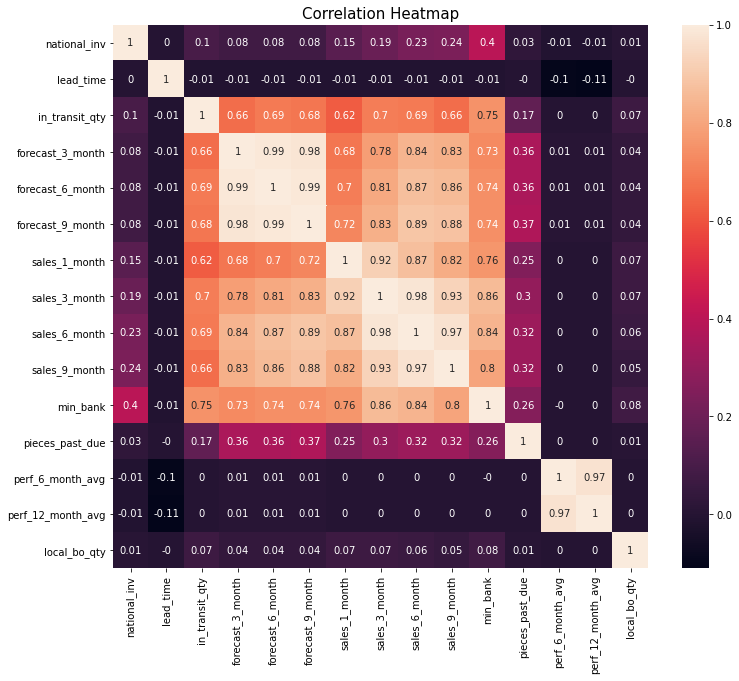

In [51]:
plt.figure(figsize=(12,10))
sns.heatmap(round(data.corr(),2),annot=True)
plt.title("Correlation Heatmap",size=15)
plt.show()

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [53]:
num_cols = data.select_dtypes(include=np.number).drop("lead_time",axis=1)
vif = [variance_inflation_factor(num_cols.values,i) for i in range(len(num_cols.columns))]
VIF = pd.DataFrame({"Feature":num_cols.columns,"vif":vif})
VIF.sort_values("vif",ascending=False,inplace=True)
VIF

,Feature,vif
3,forecast_6_month,473.799337
4,forecast_9_month,267.345009
7,sales_6_month,98.112543
2,forecast_3_month,91.728933
6,sales_3_month,61.792100
8,sales_9_month,20.771026
11,perf_6_month_avg,17.305419
12,perf_12_month_avg,17.302878
5,sales_1_month,7.629196
9,min_bank,7.438261


#### Actual Sales vs Average performance of sales

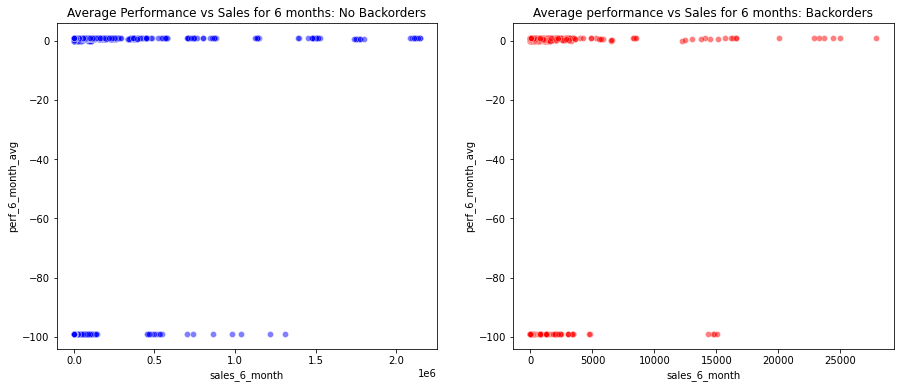

In [54]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.scatterplot(y=data[data.went_on_backorder=="No"].perf_6_month_avg,x=data[data.went_on_backorder=="No"].sales_6_month,alpha=0.5,color="blue")
plt.title("Average Performance vs Sales for 6 months: No Backorders")

plt.subplot(1,2,2)
sns.scatterplot(y=data[data.went_on_backorder=="Yes"].perf_6_month_avg,x=data[data.went_on_backorder=="Yes"].sales_6_month,alpha=0.5,color="red")
plt.title("Average performance vs Sales for 6 months: Backorders")

plt.show()

#### Did Sales for a period of n month overtake forecasted sales for double the period of n months

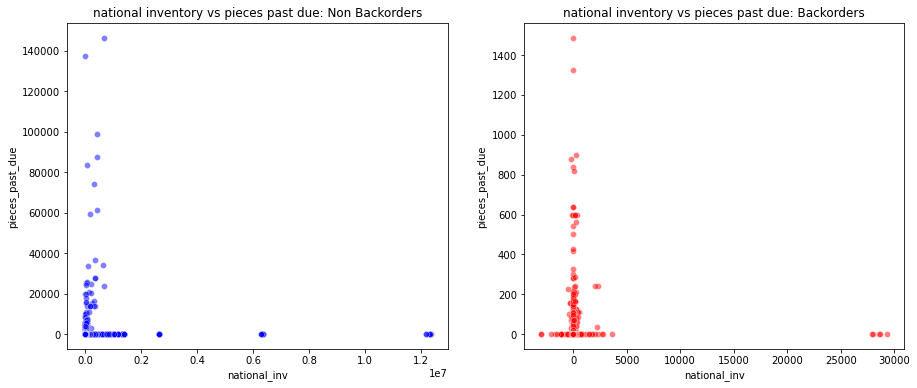

In [55]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.scatterplot(data[data.went_on_backorder=="No"].national_inv,data[data.went_on_backorder=="No"].pieces_past_due,alpha=0.5,color="blue")
plt.title("national inventory vs pieces past due: Non Backorders")

plt.subplot(1,2,2)
sns.scatterplot(data[data.went_on_backorder=="Yes"].national_inv,data[data.went_on_backorder=="Yes"].pieces_past_due,alpha=0.5,color="red")
plt.title("national inventory vs pieces past due: Backorders")
plt.show()

In [56]:
print("% of non backorders where national inventory of product was less than the stock which was past its shelf lifespan:",round(len(data[(data.went_on_backorder=="No")&(data.national_inv < data.pieces_past_due)]) / len(data[data.went_on_backorder=="No"]),4) * 100)
print("% of backorders where national inventory of product was less than the stock which was past its shelf lifespan:",round(len(data[(data.went_on_backorder=="Yes")&(data.national_inv < data.pieces_past_due)]) / len(data[data.went_on_backorder=="Yes"]),4) * 100)

% of non backorders where national inventory of product was less than the stock which was past its shelf lifespan: 0.67
% of backorders where national inventory of product was less than the stock which was past its shelf lifespan: 12.94


#### Analysis of Inventory and Quantity

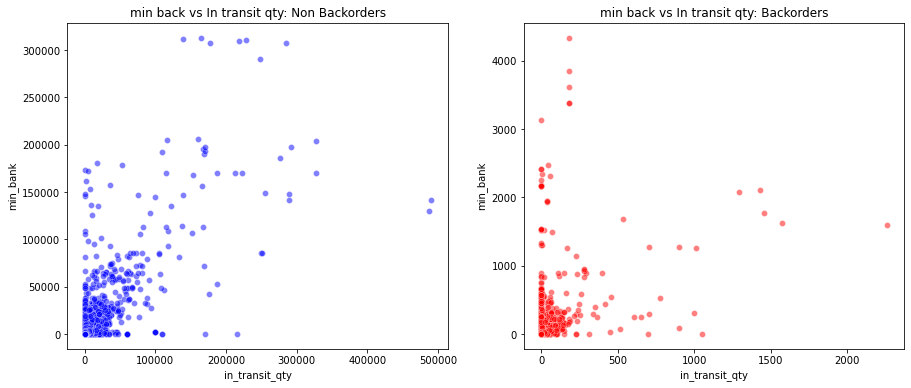

In [57]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.scatterplot(data[data.went_on_backorder=="No"].in_transit_qty,data[data.went_on_backorder=="No"].min_bank,alpha=0.5,color="blue")
plt.title("min back vs In transit qty: Non Backorders")

plt.subplot(1,2,2)
sns.scatterplot(data[data.went_on_backorder=="Yes"].in_transit_qty,data[data.went_on_backorder=="Yes"].min_bank,alpha=0.5,color="red")
plt.title("min back vs In transit qty: Backorders")

plt.show()

In [58]:
print("% of non backorders where minimum stock recommended to hold was less than what was in transit:",round(len(data[(data.went_on_backorder=="No")&(data.in_transit_qty < data.min_bank)]) / len(data[data.went_on_backorder=="No"]),4) * 100)
print("% of backorders minimum stock recommended to hold was less than what was in transit:",round(len(data[(data.went_on_backorder=="Yes")&(data.in_transit_qty < data.min_bank)]) / len(data[data.went_on_backorder=="Yes"]),4) * 100)

% of non backorders where minimum stock recommended to hold was less than what was in transit: 42.54
% of backorders minimum stock recommended to hold was less than what was in transit: 46.94


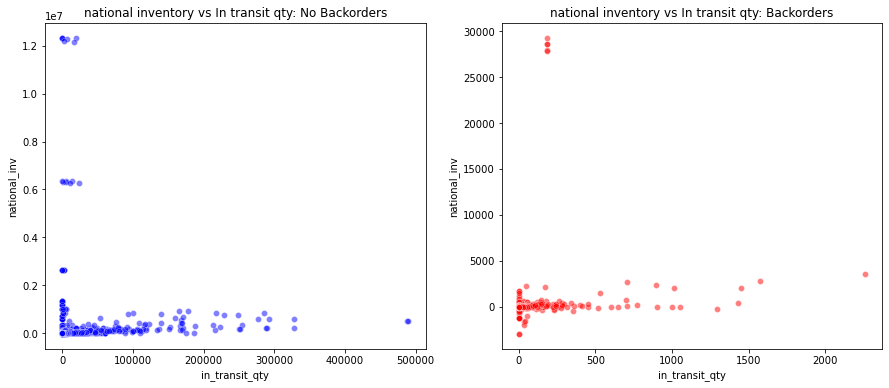

In [59]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.scatterplot(data[data.went_on_backorder=="No"].in_transit_qty,data[data.went_on_backorder=="No"].national_inv,alpha=0.5,color="blue")
plt.title("national inventory vs In transit qty: No Backorders")

plt.subplot(1,2,2)
sns.scatterplot(data[data.went_on_backorder=="Yes"].in_transit_qty,data[data.went_on_backorder=="Yes"].national_inv,alpha=0.5,color="red")
plt.title("national inventory vs In transit qty: Backorders")

plt.show()

In [60]:
print("% of non backorders where national level inventory of product was less than what was in transit:",round(len(data[(data.went_on_backorder=="No")&(data.national_inv < data.in_transit_qty)]) / len(data[data.went_on_backorder=="No"]),4) * 100)
print("% of backorders national level inventory of product was less than what was in transit:",round(len(data[(data.went_on_backorder=="Yes")&(data.national_inv < data.in_transit_qty)]) / len(data[data.went_on_backorder=="Yes"]),4) * 100)

% of non backorders where national level inventory of product was less than what was in transit: 2.98
% of backorders national level inventory of product was less than what was in transit: 11.81


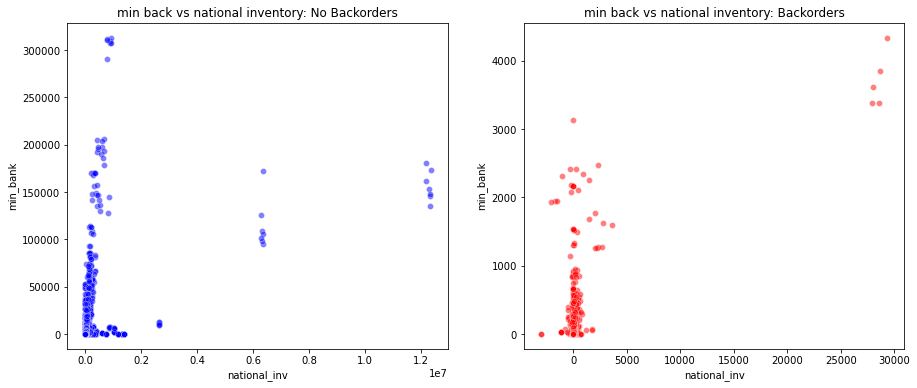

In [61]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.scatterplot(data[data.went_on_backorder=="No"].national_inv,data[data.went_on_backorder=="No"].min_bank,alpha=0.5,color="blue")
plt.title("min back vs national inventory: No Backorders")

plt.subplot(1,2,2)
sns.scatterplot(data[data.went_on_backorder=="Yes"].national_inv,data[data.went_on_backorder=="Yes"].min_bank,alpha=0.5,color="red")
plt.title("min back vs national inventory: Backorders")

plt.show()

In [62]:
print("% of non backorders where national level inventory of product was less than minimum stock that was recommended:",round((len(data[(data.went_on_backorder=="No")&(data.national_inv < data.min_bank)]) / len(data[data.went_on_backorder=="No"])) * 100,2))
print("% of backorders national level inventory of product was less than minimum stock that was recommended:",round((len(data[(data.went_on_backorder=="Yes")&(data.national_inv < data.min_bank)]) / len(data[data.went_on_backorder=="Yes"])) * 100,2))

% of non backorders where national level inventory of product was less than minimum stock that was recommended: 3.86
% of backorders national level inventory of product was less than minimum stock that was recommended: 33.8


Text(0.5, 1.0, 'Relation between ppap risk and potential issues\nFor-Backordered Products')

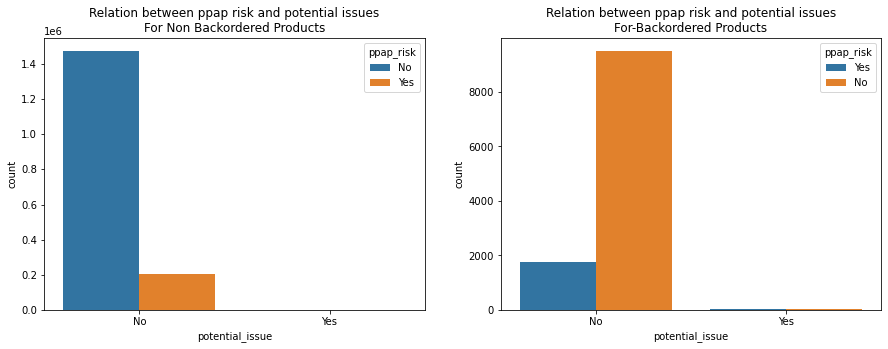

In [63]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(x=data[data.went_on_backorder=="No"].potential_issue,hue=data[data.went_on_backorder=="No"].ppap_risk)
plt.title("Relation between ppap risk and potential issues\nFor Non Backordered Products")

plt.subplot(1,2,2)
sns.countplot(x=data[data.went_on_backorder=="Yes"].potential_issue,hue=data[data.went_on_backorder=="Yes"].ppap_risk)
plt.title("Relation between ppap risk and potential issues\nFor-Backordered Products")

In [64]:

print("% of Backorders where there was a potential issue and ppap risk",len(data[(data.went_on_backorder=="Yes")&(data.potential_issue=="Yes")&(data.ppap_risk =="Yes")])/len(data[data.went_on_backorder=="Yes"])*100)
print("% of non Backorders where there was a potential issue and ppap risk",len(data[(data.went_on_backorder=="No")&(data.potential_issue=="Yes")&(data.ppap_risk =="Yes")])/len(data[data.went_on_backorder=="No"])*100)


% of Backorders where there was a potential issue and ppap risk 0.15939077304524926
% of non Backorders where there was a potential issue and ppap risk 0.012227366994578803


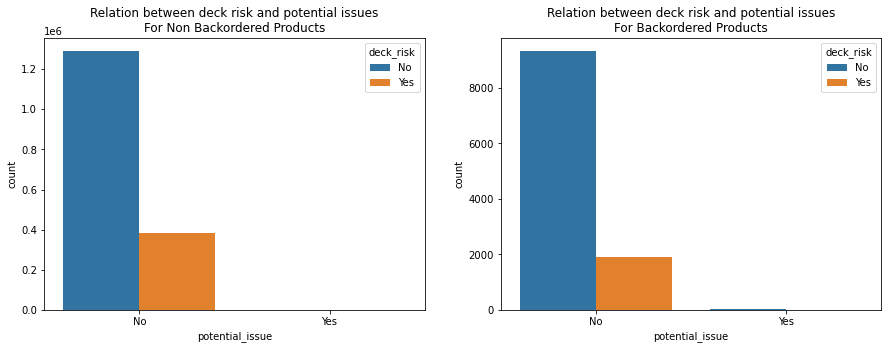

In [65]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(x=data[data.went_on_backorder=="No"].potential_issue,hue=data[data.went_on_backorder=="No"].deck_risk)
plt.title("Relation between deck risk and potential issues\nFor Non Backordered Products")

plt.subplot(1,2,2)
sns.countplot(x=data[data.went_on_backorder=="Yes"].potential_issue,hue=data[data.went_on_backorder=="Yes"].deck_risk)
plt.title("Relation between deck risk and potential issues\nFor Backordered Products")

plt.show()

In [66]:

print("% of Backorders where there was a potential issue and deck risk",len(data[(data.went_on_backorder=="Yes")&(data.potential_issue=="Yes")&(data.deck_risk =="Yes")])/len(data[data.went_on_backorder=="Yes"])*100)
print("% of non Backorders where there was a potential issue and deck risk",len(data[(data.went_on_backorder=="No")&(data.potential_issue=="Yes")&(data.deck_risk =="Yes")])/len(data[data.went_on_backorder=="No"])*100)


% of Backorders where there was a potential issue and deck risk 0.07084034357566635
% of non Backorders where there was a potential issue and deck risk 0.01425532054489919


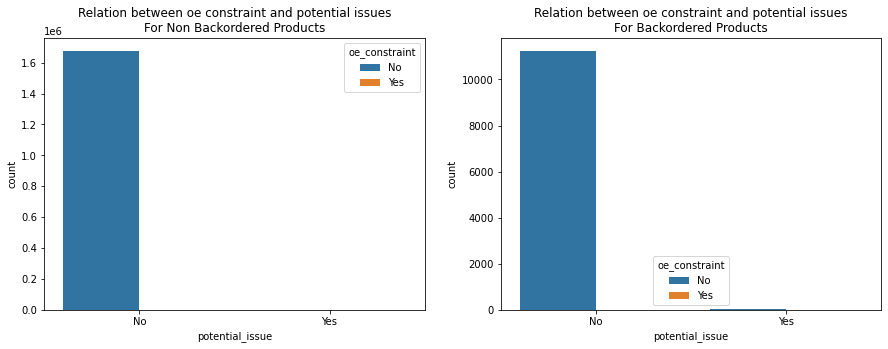

In [67]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(x=data[data.went_on_backorder=="No"].potential_issue,hue=data[data.went_on_backorder=="No"].oe_constraint)
plt.title("Relation between oe constraint and potential issues\nFor Non Backordered Products")

plt.subplot(1,2,2)
sns.countplot(x=data[data.went_on_backorder=="Yes"].potential_issue,hue=data[data.went_on_backorder=="Yes"].oe_constraint)
plt.title("Relation between oe constraint and potential issues\nFor Backordered Products")

plt.show()

In [68]:

print("% of Backorders where there was a potential issue and oe constraint",len(data[(data.went_on_backorder=="Yes")&(data.potential_issue=="Yes")&(data.oe_constraint =="Yes")])/len(data[data.went_on_backorder=="Yes"])*100)
print("% of non Backorders where there was a potential issue and oe constraint",len(data[(data.went_on_backorder=="No")&(data.potential_issue=="Yes")&(data.oe_constraint =="Yes")])/len(data[data.went_on_backorder=="No"])*100)


% of Backorders where there was a potential issue and oe constraint 0.0
% of non Backorders where there was a potential issue and oe constraint 0.00041751984859537375


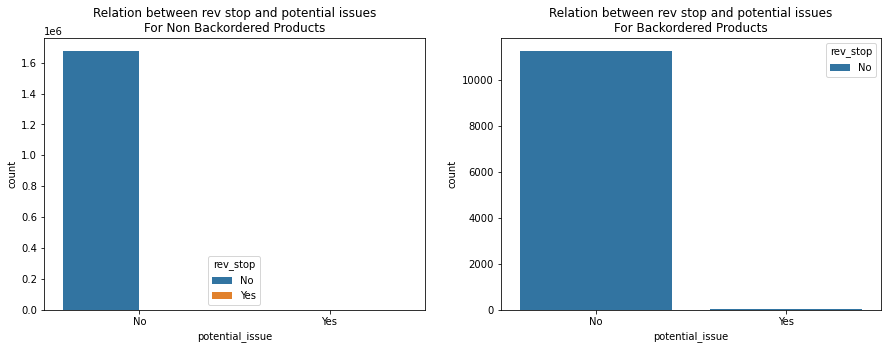

In [69]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(x=data[data.went_on_backorder=="No"].potential_issue,hue=data[data.went_on_backorder=="No"].rev_stop)
plt.title("Relation between rev stop and potential issues\nFor Non Backordered Products")

plt.subplot(1,2,2)
sns.countplot(x=data[data.went_on_backorder=="Yes"].potential_issue,hue=data[data.went_on_backorder=="Yes"].rev_stop)
plt.title("Relation between rev stop and potential issues\nFor Backordered Products")

plt.show()

In [70]:

print("% of Backorders where there was a potential issue and rev stop",len(data[(data.went_on_backorder=="Yes")&(data.potential_issue=="Yes")&(data.rev_stop =="Yes")])/len(data[data.went_on_backorder=="Yes"])*100)
print("% of non Backorders where there was a potential issue and rev stop",len(data[(data.went_on_backorder=="No")&(data.potential_issue=="Yes")&(data.rev_stop =="Yes")])/len(data[data.went_on_backorder=="No"])*100)


% of Backorders where there was a potential issue and rev stop 0.0
% of non Backorders where there was a potential issue and rev stop 0.0


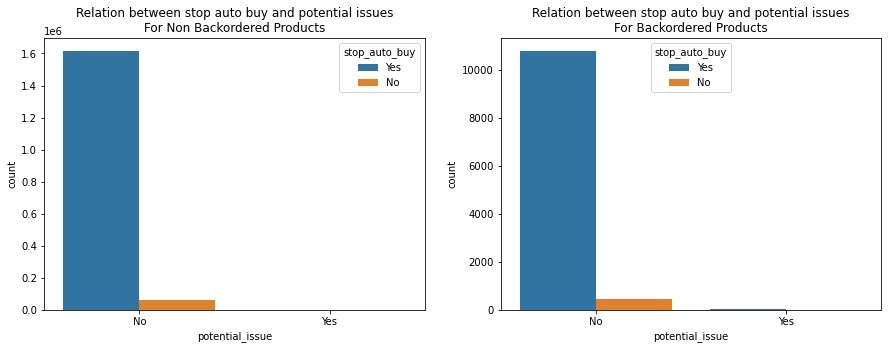

In [71]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(x=data[data.went_on_backorder=="No"].potential_issue,hue=data[data.went_on_backorder=="No"].stop_auto_buy)
plt.title("Relation between stop auto buy and potential issues\nFor Non Backordered Products")

plt.subplot(1,2,2)
sns.countplot(x=data[data.went_on_backorder=="Yes"].potential_issue,hue=data[data.went_on_backorder=="Yes"].stop_auto_buy)
plt.title("Relation between stop auto buy and potential issues\nFor Backordered Products")

plt.show()

In [72]:

print("% of Backorders where there was a potential issue and auto buy stop",len(data[(data.went_on_backorder=="Yes")&(data.potential_issue=="Yes")&(data.stop_auto_buy =="Yes")])/len(data[data.went_on_backorder=="Yes"])*100)
print("% of non Backorders where there was a potential issue auto buy stop",len(data[(data.went_on_backorder=="No")&(data.potential_issue=="Yes")&(data.stop_auto_buy =="Yes")])/len(data[data.went_on_backorder=="No"])*100)


% of Backorders where there was a potential issue and auto buy stop 0.45160719029487295
% of non Backorders where there was a potential issue auto buy stop 0.05016202752410133


#### Observations

- Based on the correlation heatmap, we observed that the dataset has a huge amount of multicollinearity with more than 30 pairs of numerical features having a correlation of 0.80 or higher.
- We can see features like sales, forecasts and performance which are given for multiple months i.e 1, 3, 6, 9 or 12 months. However, all of them mainly have they same type and magnitude of correlationship with other features. Also, these features are contributing the most to the multi-collinearity. 
- On analysing the variance inflation factors, we can see that the vif for these features is beyond accepted levels of 10, which is causing high multi-collinearity.
- Hence for sales, forecasts and performance, we will keep 1 features for each and get rid of the other similar features.


- In terms of analysis, when understanding the relation of minimum recommended stock of product to hold with stock in transit with respect to backorders and non-backorders, we observed that in for backorders, there we many cases where the minimum stock recommended to hold was way more than the stock that was in circulation.
- Also, around 12% of backordered products observed more no. of pieces past due than the total national inventory for the product. The figure was less than 1% for non backordered items.
- Also, we noticed that for 12 % of backordered items, the national level of inventory has remained same irrespective of the amount of stock in transition. For non backordered items, the number was only 3%.
- Also, we noticed that for 33% of backordered items, the national level inventory for the product was lower than the minimum stock recommended to hold. The figure was only 3% In case of non backordered items.


- Within categorical features, we can observed that there were a few backordered items which had a potential issue flag and ppap risk, deck risk or risk of stopping auto buy attached with them. For non backordered items, such risks was significantly quite low.


**At the end of the EDA, we can claim that based on %, graphical and statistical analysis, the features we have are useful to clearly distinguish between the two classes. However, the imbalance in the target classes needs to be corrected.**

In [73]:
data.drop(["sales_1_month","sales_3_month","sales_9_month","forecast_3_month","forecast_9_month","perf_12_month_avg"],axis=1,inplace=True)
logger.info("Dropping high correlated independent numerical features causing high multi-collinearity")

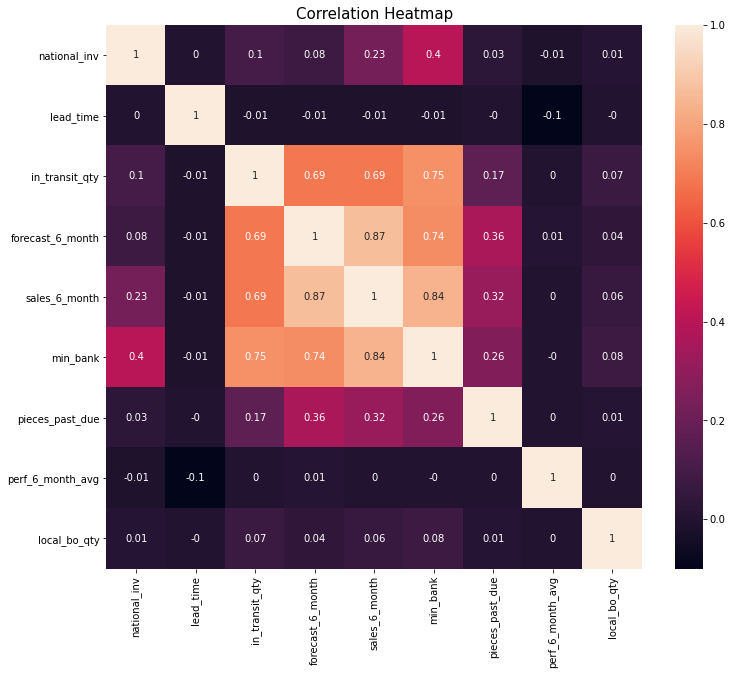

In [74]:
plt.figure(figsize=(12,10))
sns.heatmap(round(data.corr(),2),annot=True)
plt.title("Correlation Heatmap",size=15)
plt.show()

In [75]:
num_cols = data.select_dtypes(include=np.number).drop("lead_time",axis=1)
vif = [variance_inflation_factor(num_cols.values,i) for i in range(len(num_cols.columns))]
VIF = pd.DataFrame({"Feature":num_cols.columns,"vif":vif})
VIF.sort_values("vif",ascending=False,inplace=True)
VIF

,Feature,vif
3,sales_6_month,6.201769
4,min_bank,5.408817
2,forecast_6_month,4.754100
1,in_transit_qty,2.745326
0,national_inv,1.452567
5,pieces_past_due,1.174869
7,local_bo_qty,1.007766
6,perf_6_month_avg,1.000431


In [76]:
logger.info("Exploratory Data Analysis completed")

### Seperating Predictors and Predicted variables.

In [77]:
X = data.drop("went_on_backorder",axis=1)
y = data.went_on_backorder

In [78]:
X.to_csv("Xsample.csv")
y.to_csv("Ysample.csv")

# Data Preparation

In [3]:
X = pd.read_csv("Xsample.csv")
y = pd.read_csv("Ysample.csv")
y.replace({"No":0,"Yes":1},inplace=True)


In [4]:
X.shape

(1687860, 17)

In [5]:
y.shape

(1687860, 2)

In [6]:
X.drop(["Unnamed: 0","sku"],axis=1,inplace=True)
y.drop("Unnamed: 0",axis=1,inplace=True)
logger.info("Dropped unnamed column created and the stock keeping unit feature")

2021-10-04 10:19:29 INFO-Dropped unnamed column created and the stock keeping unit feature


In [7]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder,PowerTransformer
from sklearn.model_selection import train_test_split

### NOTE - 

- We noted at the end of EDA that the imbalance in the target classes needs to be corrected. Due to a very high ratio difference between  backorders and non backorders , we have decided to undersample the non backorders

- However, since this project is going to be deployed on a large scale basis, we need to take care of the data leakage issue to maintain model generalizability and performance across train, test and unseen data passed by user.

- For this we will first split the data into train and test samples, perform required data preparation across the samples and combine them and then undersample. We do this so that we dont apply the fit methods on the entire data and apply fit on the train and transform the test samples.

- Following undersample, we will again split into train and test for model building.

## Splitting the data into train and test for preprocessing

In [8]:
logger.info("Splitting Data into train and test samples")
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.30,random_state=0,stratify=y)

2021-10-04 10:19:29 INFO-Splitting Data into train and test samples


## Treating the Missing Values

In [9]:
Xtrain.lead_time.isnull().sum() / len(Xtrain) * 100

5.9678273925901095

In [10]:
Xtrain.lead_time.value_counts()

8.0     477850
2.0     236227
12.0    139608
4.0      89957
9.0      86555
52.0     21147
3.0      11333
10.0      9829
0.0       7334
14.0      7216
16.0      6190
13.0      3799
6.0       3779
5.0       2839
15.0      2670
17.0      2634
11.0       788
20.0       282
30.0       211
18.0       153
7.0        148
22.0        96
24.0        74
26.0        74
28.0        64
40.0        36
21.0        31
35.0        25
19.0        15
1.0         14
23.0         9
25.0         5
Name: lead_time, dtype: int64

Inferences about Missing values - 

- As observed during EDA, only 1 feature with missing values i.e lead time.
- The % of missing values is around 6%.
- The feature has many unique values, with around 50% being for 8 lead days.
- We can use **simple imputer and replace values with most frequent** lead time, which is clearly 8 days.

In [11]:
SI = SimpleImputer(strategy="most_frequent").fit(Xtrain.lead_time.values.reshape(-1,1))
Xtrain.lead_time = SI.transform(Xtrain.lead_time.values.reshape(-1,1))
Xtest.lead_time = SI.transform(Xtest.lead_time.values.reshape(-1,1))

In [12]:
logger.info("Missing Values In lead time replaced successfully")

2021-10-04 10:19:39 INFO-Missing Values In lead time replaced successfully


In [13]:
print("Missing values in training data for lead time:",Xtrain.lead_time.isnull().sum())
print("Missing values in testingdata for lead time:",Xtest.lead_time.isnull().sum())

Missing values in training data for lead time: 0
Missing values in testingdata for lead time: 0


In [14]:
print("Number of records in train:",len(Xtrain))
print("Number of records in test:",len(Xtest))
print("Total records in train test combined:",len(X))

Number of records in train: 1181502
Number of records in test: 506358
Total records in train test combined: 1687860


## Outlier Treatment

In [15]:
Xtrain.head()

,national_inv,lead_time,in_transit_qty,forecast_6_month,sales_6_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop
1314790,63.0,2.0,0.0,0.0,1.0,1.0,No,0.0,0.98,0.0,No,No,No,Yes,No
411419,30.0,9.0,0.0,0.0,9.0,0.0,No,0.0,1.00,0.0,No,No,No,Yes,No
1296471,483.0,4.0,14.0,398.0,577.0,37.0,No,0.0,0.73,0.0,No,No,No,Yes,No
893198,15.0,9.0,0.0,0.0,0.0,0.0,No,0.0,0.94,0.0,Yes,No,No,Yes,No
1332269,189.0,8.0,108.0,75.0,199.0,35.0,No,0.0,0.94,0.0,No,No,No,Yes,No


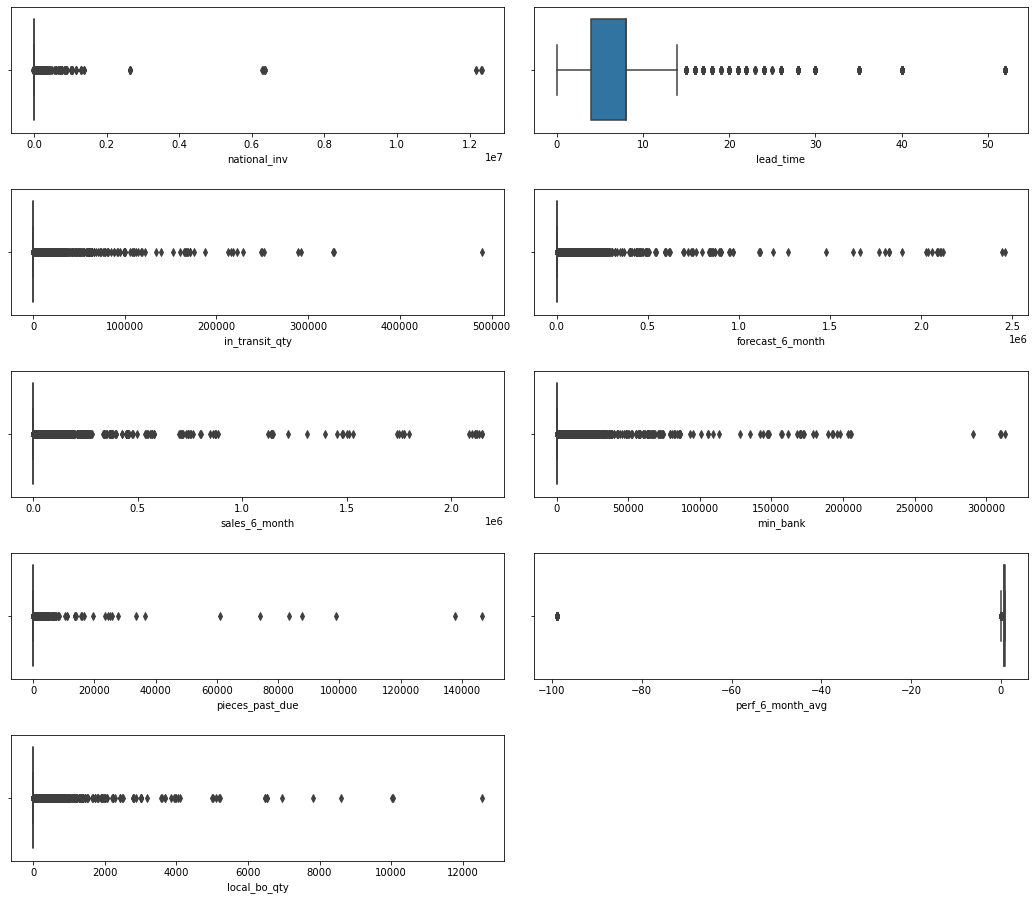

In [16]:
plt.figure(figsize=(15,20))
for index,col in enumerate(Xtrain.select_dtypes(include=np.number).columns):
    plt.subplot(8,2,index+1)
    plt.tight_layout(pad=2,h_pad=2)
    sns.boxplot(Xtrain[col])

In [17]:
print("Skewness in the numerical values of Xtrain")
Xtrain.skew()

Skewness in the numerical values of Xtrain


national_inv        347.601037
lead_time             4.694052
in_transit_qty      154.232710
forecast_6_month    138.734209
sales_6_month       138.713382
min_bank            126.405895
pieces_past_due     388.548725
perf_6_month_avg     -3.180772
local_bo_qty        171.573102
dtype: float64

In [18]:
print("Skewness in the numerical values of Xtest")
Xtest.skew()

Skewness in the numerical values of Xtest


national_inv        320.817286
lead_time             4.698560
in_transit_qty      194.065631
forecast_6_month    121.384881
sales_6_month       131.870319
min_bank            142.643572
pieces_past_due     262.006714
perf_6_month_avg     -3.180282
local_bo_qty        142.425008
dtype: float64

Inferences About Outliers - 
- We can observe that there are outliers in all numerical features.
- Except performance of 6 month average, all other features are heavy positive skewness.
- We can observe very extremely high outliers in all features.
- The triple digit skewness values indicate the outliers are extreme.
- We cannot cap such outliers due to being very far from whisker.
- We cannot also drop the values as they are many in number.
- Hence, we will use **power transformation to reduce the impact of outliers** since it can deal with both positive, negative and 0 value terms.

In [19]:
PT = PowerTransformer().fit(Xtrain.select_dtypes(include=np.number))

Xtrain[Xtrain.select_dtypes(include=np.number).columns] = PT.transform(Xtrain.select_dtypes(include=np.number))
Xtest[Xtest.select_dtypes(include=np.number).columns] = PT.transform(Xtest.select_dtypes(include=np.number))

In [20]:
logger.info("Numerical Features successfully transformed using Power transformation to treat the impact of extreme outliers")

2021-10-04 10:20:04 INFO-Numerical Features successfully transformed using Power transformation to treat the impact of extreme outliers


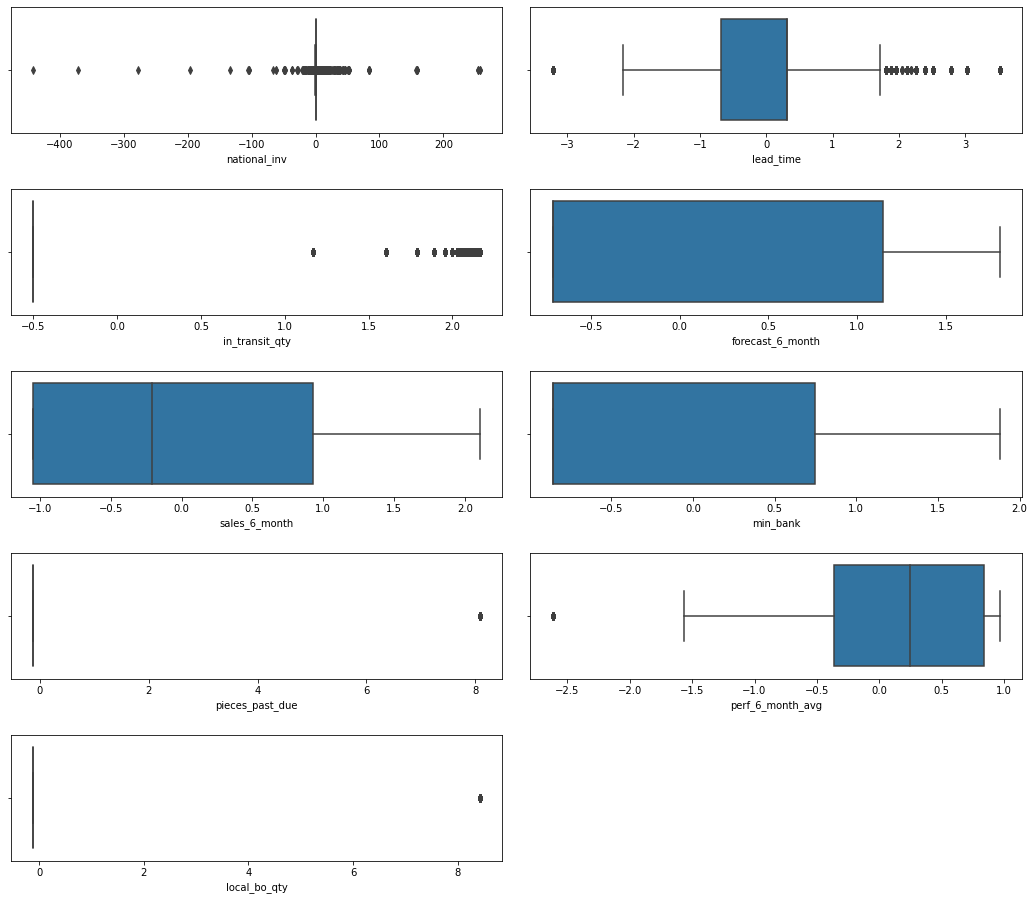

In [21]:
plt.figure(figsize=(15,20))
for index,col in enumerate(Xtrain.select_dtypes(include=np.number).columns):
    plt.subplot(8,2,index+1)
    plt.tight_layout(pad=2,h_pad=2)
    sns.boxplot(Xtrain[col])

In [22]:
print("Skewness in the numerical values of Xtrain after transformation")
Xtrain.skew()

Skewness in the numerical values of Xtrain after transformation


national_inv       -66.749326
lead_time            0.018895
in_transit_qty       1.532484
forecast_6_month     0.785492
sales_6_month        0.318216
min_bank             0.633564
pieces_past_due      7.961908
perf_6_month_avg    -1.351009
local_bo_qty         8.308472
dtype: float64

In [23]:
print("Skewness in the numerical values of Xtest after transformation")
Xtest.skew()

Skewness in the numerical values of Xtest after transformation


national_inv       -148.494042
lead_time             0.010282
in_transit_qty        1.546821
forecast_6_month      0.787866
sales_6_month         0.320459
min_bank              0.642570
pieces_past_due       8.039214
perf_6_month_avg     -1.348843
local_bo_qty          8.367713
dtype: float64

In [24]:
print("Number of records in train:",len(Xtrain))
print("Number of records in test:",len(Xtest))
print("Total records in train test combined:",len(X))

Number of records in train: 1181502
Number of records in test: 506358
Total records in train test combined: 1687860


## Encoding

In [25]:
Xtrain.select_dtypes(include=np.object).nunique()

potential_issue    2
deck_risk          2
oe_constraint      2
ppap_risk          2
stop_auto_buy      2
rev_stop           2
dtype: int64

Inferences - 

- Based on the analysis of the number of categories in each feature, we observe that all categorical features have only 2 categories.
- Due to less no. of unique categories, we can easily use **one hot encoding**

In [26]:
OHE = OneHotEncoder(drop="first").fit(Xtrain.select_dtypes(include=np.object))

Xtrain_OHE = pd.DataFrame(OHE.transform(Xtrain.select_dtypes(include=np.object)).toarray(),columns=OHE.get_feature_names(),index=Xtrain.index)
Xtest_OHE = pd.DataFrame(OHE.transform(Xtest.select_dtypes(include=np.object)).toarray(),columns=OHE.get_feature_names(),index=Xtest.index)

In [27]:
Xtrain.head()

,national_inv,lead_time,in_transit_qty,forecast_6_month,sales_6_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop
1314790,-0.035304,-1.515638,-0.501005,-0.716707,-0.491927,0.120353,No,-0.123677,0.877671,-0.118664,No,No,No,Yes,No
411419,-0.050881,0.489817,-0.501005,-0.716707,0.458275,-0.858639,No,-0.123677,0.964001,-0.118664,No,No,No,Yes,No
1296471,0.091714,-0.682611,2.107086,1.695437,1.605824,1.609888,No,-0.123677,-0.060324,-0.118664,No,No,No,Yes,No
893198,-0.059466,0.489817,-0.501005,-0.716707,-1.049839,-0.858639,No,-0.123677,0.710215,-0.118664,Yes,No,No,Yes,No
1332269,0.010444,0.308412,2.160862,1.543047,1.416252,1.600473,No,-0.123677,0.710215,-0.118664,No,No,No,Yes,No


In [28]:
Xtrain_OHE.head()

,x0_Yes,x1_Yes,x2_Yes,x3_Yes,x4_Yes,x5_Yes
1314790,0.0,0.0,0.0,0.0,1.0,0.0
411419,0.0,0.0,0.0,0.0,1.0,0.0
1296471,0.0,0.0,0.0,0.0,1.0,0.0
893198,0.0,1.0,0.0,0.0,1.0,0.0
1332269,0.0,0.0,0.0,0.0,1.0,0.0


In [29]:
Xtrain = Xtrain.merge(Xtrain_OHE,left_index=True,right_index=True)
Xtest = Xtest.merge(Xtest_OHE,left_index=True,right_index=True)

In [30]:
print("Number of records in train:",len(Xtrain))
print("Number of records in test:",len(Xtest))
print("Total records in train test combined:",len(X))

Number of records in train: 1181502
Number of records in test: 506358
Total records in train test combined: 1687860


In [31]:
Xtrain.columns

Index(['national_inv', 'lead_time', 'in_transit_qty', 'forecast_6_month',
       'sales_6_month', 'min_bank', 'potential_issue', 'pieces_past_due',
       'perf_6_month_avg', 'local_bo_qty', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop', 'x0_Yes', 'x1_Yes', 'x2_Yes',
       'x3_Yes', 'x4_Yes', 'x5_Yes'],
      dtype='object')

In [32]:
Xtrain.head()

,national_inv,lead_time,in_transit_qty,forecast_6_month,sales_6_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,local_bo_qty,...,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,x0_Yes,x1_Yes,x2_Yes,x3_Yes,x4_Yes,x5_Yes
1314790,-0.035304,-1.515638,-0.501005,-0.716707,-0.491927,0.120353,No,-0.123677,0.877671,-0.118664,...,No,No,Yes,No,0.0,0.0,0.0,0.0,1.0,0.0
411419,-0.050881,0.489817,-0.501005,-0.716707,0.458275,-0.858639,No,-0.123677,0.964001,-0.118664,...,No,No,Yes,No,0.0,0.0,0.0,0.0,1.0,0.0
1296471,0.091714,-0.682611,2.107086,1.695437,1.605824,1.609888,No,-0.123677,-0.060324,-0.118664,...,No,No,Yes,No,0.0,0.0,0.0,0.0,1.0,0.0
893198,-0.059466,0.489817,-0.501005,-0.716707,-1.049839,-0.858639,No,-0.123677,0.710215,-0.118664,...,No,No,Yes,No,0.0,1.0,0.0,0.0,1.0,0.0
1332269,0.010444,0.308412,2.160862,1.543047,1.416252,1.600473,No,-0.123677,0.710215,-0.118664,...,No,No,Yes,No,0.0,0.0,0.0,0.0,1.0,0.0


In [33]:
ytrain.head()

,went_on_backorder
1314790,0
411419,0
1296471,0
893198,0
1332269,0


In [34]:
Xtrain.drop(["ppap_risk","stop_auto_buy","deck_risk","potential_issue","oe_constraint","rev_stop"],axis=1,inplace=True)
Xtest.drop(["ppap_risk","stop_auto_buy","deck_risk","potential_issue","oe_constraint","rev_stop"],axis=1,inplace=True)

In [35]:
logger.info("Categorical Features successfully one hot encoded")

2021-10-04 10:20:13 INFO-Categorical Features successfully one hot encoded


## Undersampling the Majority Class i.e No Backorders

#### Note - 
- Since the majority and minority classes have a drastic ratio of close to approx 99 to 1, we need to undersampe the majority classes in order to improve performance of model.
- However, in order to retain a little bit of the real life scenario in terms of balance of backorders and non backorders, we will maintain a ratio between the two in such as way that the ratio is around 25:75 or 1:3.
- To undersample, we will use **NearMiss technique**.

In [36]:
nums = ['national_inv', 'lead_time', 'in_transit_qty', 'forecast_6_month',
       'sales_6_month', 'min_bank', 'pieces_past_due', 'perf_6_month_avg',
       'local_bo_qty']

In [37]:
X = Xtrain.append(Xtest)
y = ytrain.append(ytest)
logger.info("Combined processed train and test samples into 1 bigger sample for undersampling")


2021-10-04 10:20:13 INFO-Combined processed train and test samples into 1 bigger sample for undersampling


In [38]:
Xtrain.head()

,national_inv,lead_time,in_transit_qty,forecast_6_month,sales_6_month,min_bank,pieces_past_due,perf_6_month_avg,local_bo_qty,x0_Yes,x1_Yes,x2_Yes,x3_Yes,x4_Yes,x5_Yes
1314790,-0.035304,-1.515638,-0.501005,-0.716707,-0.491927,0.120353,-0.123677,0.877671,-0.118664,0.0,0.0,0.0,0.0,1.0,0.0
411419,-0.050881,0.489817,-0.501005,-0.716707,0.458275,-0.858639,-0.123677,0.964001,-0.118664,0.0,0.0,0.0,0.0,1.0,0.0
1296471,0.091714,-0.682611,2.107086,1.695437,1.605824,1.609888,-0.123677,-0.060324,-0.118664,0.0,0.0,0.0,0.0,1.0,0.0
893198,-0.059466,0.489817,-0.501005,-0.716707,-1.049839,-0.858639,-0.123677,0.710215,-0.118664,0.0,1.0,0.0,0.0,1.0,0.0
1332269,0.010444,0.308412,2.160862,1.543047,1.416252,1.600473,-0.123677,0.710215,-0.118664,0.0,0.0,0.0,0.0,1.0,0.0


In [39]:
X.head()

,national_inv,lead_time,in_transit_qty,forecast_6_month,sales_6_month,min_bank,pieces_past_due,perf_6_month_avg,local_bo_qty,x0_Yes,x1_Yes,x2_Yes,x3_Yes,x4_Yes,x5_Yes
1314790,-0.035304,-1.515638,-0.501005,-0.716707,-0.491927,0.120353,-0.123677,0.877671,-0.118664,0.0,0.0,0.0,0.0,1.0,0.0
411419,-0.050881,0.489817,-0.501005,-0.716707,0.458275,-0.858639,-0.123677,0.964001,-0.118664,0.0,0.0,0.0,0.0,1.0,0.0
1296471,0.091714,-0.682611,2.107086,1.695437,1.605824,1.609888,-0.123677,-0.060324,-0.118664,0.0,0.0,0.0,0.0,1.0,0.0
893198,-0.059466,0.489817,-0.501005,-0.716707,-1.049839,-0.858639,-0.123677,0.710215,-0.118664,0.0,1.0,0.0,0.0,1.0,0.0
1332269,0.010444,0.308412,2.160862,1.543047,1.416252,1.600473,-0.123677,0.710215,-0.118664,0.0,0.0,0.0,0.0,1.0,0.0


In [40]:
X.tail()

,national_inv,lead_time,in_transit_qty,forecast_6_month,sales_6_month,min_bank,pieces_past_due,perf_6_month_avg,local_bo_qty,x0_Yes,x1_Yes,x2_Yes,x3_Yes,x4_Yes,x5_Yes
146560,-0.053579,-1.515638,-0.501005,1.494662,0.946017,0.899052,-0.123677,0.248210,-0.118664,0.0,1.0,0.0,0.0,1.0,0.0
453990,-0.071556,0.308412,-0.501005,0.049201,-1.049839,0.120353,-0.123677,-0.808003,-0.118664,0.0,0.0,0.0,0.0,1.0,0.0
1191947,-0.070334,0.308412,-0.501005,-0.716707,-1.049839,-0.858639,-0.123677,0.920617,-0.118664,0.0,0.0,0.0,0.0,1.0,0.0
2059,0.004279,0.308412,-0.501005,-0.716707,1.056314,1.249210,-0.123677,0.471779,-0.118664,0.0,0.0,0.0,0.0,1.0,0.0
854998,0.145673,0.308412,2.128799,-0.716707,1.422316,1.622583,-0.123677,0.920617,-0.118664,0.0,0.0,0.0,0.0,1.0,0.0


In [41]:
Xtest.tail()

,national_inv,lead_time,in_transit_qty,forecast_6_month,sales_6_month,min_bank,pieces_past_due,perf_6_month_avg,local_bo_qty,x0_Yes,x1_Yes,x2_Yes,x3_Yes,x4_Yes,x5_Yes
146560,-0.053579,-1.515638,-0.501005,1.494662,0.946017,0.899052,-0.123677,0.248210,-0.118664,0.0,1.0,0.0,0.0,1.0,0.0
453990,-0.071556,0.308412,-0.501005,0.049201,-1.049839,0.120353,-0.123677,-0.808003,-0.118664,0.0,0.0,0.0,0.0,1.0,0.0
1191947,-0.070334,0.308412,-0.501005,-0.716707,-1.049839,-0.858639,-0.123677,0.920617,-0.118664,0.0,0.0,0.0,0.0,1.0,0.0
2059,0.004279,0.308412,-0.501005,-0.716707,1.056314,1.249210,-0.123677,0.471779,-0.118664,0.0,0.0,0.0,0.0,1.0,0.0
854998,0.145673,0.308412,2.128799,-0.716707,1.422316,1.622583,-0.123677,0.920617,-0.118664,0.0,0.0,0.0,0.0,1.0,0.0


In [42]:
print("Number of records in train:",len(Xtrain))
print("Number of records in test:",len(Xtest))
print("Total records in train test combined:",len(X))

Number of records in train: 1181502
Number of records in test: 506358
Total records in train test combined: 1687860


In [43]:
SC = StandardScaler().fit(X[list(nums)])
X[list(nums)] = SC.transform(X[list(nums)])
logger.info("Numerical features scaled for the purpose of undersampling")


2021-10-04 10:20:14 INFO-Numerical features scaled for the purpose of undersampling


In [44]:
Xtrain.shape

(1181502, 15)

In [45]:
Xtest.shape

(506358, 15)

In [46]:
! pip install imblearn

In [47]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import NearMiss
from collections import Counter

NM = NearMiss(sampling_strategy=0.25)
X_under , y_under = NM.fit_resample(X,y)
logger.info("Majority Class undersampled to make it 3 times the count of minority class instances")

2021-10-04 10:25:23 INFO-Majority Class undersampled to make it 3 times the count of minority class instances


In [48]:
print(f"befor Undersampling: {y.value_counts().to_dict()}")
print(f"After Undersampling using NearMiss technique {y_under.value_counts().to_dict()}")

befor Undersampling: {(0,): 1676567, (1,): 11293}
After Undersampling using NearMiss technique {(0,): 45172, (1,): 11293}


In [49]:
X_under[list(nums)] = SC.inverse_transform(X_under[list(nums)])

In [50]:
X_under.head()

,national_inv,lead_time,in_transit_qty,forecast_6_month,sales_6_month,min_bank,pieces_past_due,perf_6_month_avg,local_bo_qty,x0_Yes,x1_Yes,x2_Yes,x3_Yes,x4_Yes,x5_Yes
0,-0.071556,0.308412,-0.501005,-0.716707,-1.049839,-0.858639,-0.123677,0.920617,-0.118664,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.071556,0.308412,-0.501005,-0.716707,-1.049839,-0.858639,-0.123677,-2.618379,-0.118664,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.068315,0.308412,-0.501005,-0.716707,-1.049839,0.120353,-0.123677,0.877671,-0.118664,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.071556,0.308412,-0.501005,-0.716707,-1.049839,-0.858639,-0.123677,-2.618379,-0.118664,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.069277,0.308412,-0.501005,-0.716707,-1.049839,-0.858639,-0.123677,0.358166,-0.118664,0.0,0.0,0.0,0.0,1.0,0.0


In [51]:
X_under.to_csv("X_undersampled.csv")
y_under.to_csv("Y_undersampled.csv")

## Splitting Into Train and Test for model building

In [52]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X_under,y_under,test_size=0.30,random_state=0,stratify=y_under)
logger.info("Data Split into train and test samples for model building")


2021-10-04 10:25:26 INFO-Data Split into train and test samples for model building


In [53]:
Xtrain.to_csv("xtrain.csv")
Xtest.to_csv("xtest.csv")
ytrain.to_csv("ytrain.csv")
ytest.to_csv("ytest.csv")
logger.info("train and test samples saved for model building in script 3.")


2021-10-04 10:25:27 INFO-train and test samples saved for model building in script 3.


# Data Preparation

In [209]:

xtrain = pd.read_csv("xtrain.csv")
xtest = pd.read_csv("xtest.csv")
ytrain = pd.read_csv("ytrain.csv")
ytest = pd.read_csv("ytest.csv")
logger.info("Train and Test Samples Imported")

2021-10-04 08:37:17 INFO-Train and Test Samples Imported
2021-10-04 08:37:17 INFO-Train and Test Samples Imported
2021-10-04 08:37:17 INFO-Train and Test Samples Imported
2021-10-04 08:37:17 INFO-Train and Test Samples Imported


In [210]:
xtrain.drop(["Unnamed: 0"],axis=1,inplace=True)
xtest.drop(["Unnamed: 0"],axis=1,inplace=True)
ytrain.drop(["Unnamed: 0"],axis=1,inplace=True)
ytest.drop(["Unnamed: 0"],axis=1,inplace=True)


In [211]:
from sklearn.preprocessing import StandardScaler

# Building ML Models

In [212]:
logger.info("Building Baseline")

2021-10-04 08:37:17 INFO-Building Baseline
2021-10-04 08:37:17 INFO-Building Baseline
2021-10-04 08:37:17 INFO-Building Baseline
2021-10-04 08:37:17 INFO-Building Baseline


In [213]:
## Importing Required functions for model building
import pickle

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

from sklearn.metrics import f1_score,accuracy_score,recall_score,classification_report,confusion_matrix,roc_auc_score,roc_curve

from sklearn.model_selection import cross_val_score, GridSearchCV

import datetime

logger.info("Imported required functions for building models, evaluation and further model tuning")

2021-10-04 08:37:17 INFO-Imported required functions for building models, evaluation and further model tuning
2021-10-04 08:37:17 INFO-Imported required functions for building models, evaluation and further model tuning
2021-10-04 08:37:17 INFO-Imported required functions for building models, evaluation and further model tuning
2021-10-04 08:37:17 INFO-Imported required functions for building models, evaluation and further model tuning


In [214]:
!pip install xgboost

In [215]:
from xgboost import XGBClassifier

In [216]:
nums = ['national_inv', 'lead_time', 'in_transit_qty', 'forecast_6_month',
       'sales_6_month', 'min_bank', 'pieces_past_due', 'perf_6_month_avg',
       'local_bo_qty']

In [217]:
baseline_results = pd.DataFrame({"Model":None,"Train F1 score":None,"Test F1":None,"ROC-AUC":None,"CV F1 average":None,"CV F1 std average":None,"Model Latency for 1 unit":None},index=range(1))

In [218]:
def build_baseline_model(estimator,x_training,y_training,x_testing,y_testing,scaling=False,num_cols = None):
    
    """
    Creates a ML Model for given estimator and train sample and tests on test sample. Performs cross validation too. Uses f1 score for evaluation.
    
    Note - It is assumed that missing values treatment, outlier treatment, transformation and encoding have already been performed.
    
    Arguments - 
    
    1. num_cols : A list of numerical features in the dataset. If not passed, function will try to find numerical features
    
    """
    if str(f"{estimator}").replace("()","") == "XGBClassifier":
        model_str = "XGBClassifier"
    else:
        model_str = str(f"{estimator}").replace("()","")
    
    
    if num_cols == None:
        nums_cols = list(x_training.select_dtypes(include=np.object).columns)
    
    
    if scaling == True:
        from sklearn.preprocessing import StandardScaler
        SC = StandardScaler().fit(x_training[list(num_cols)])
        x_training[list(nums)] = SC.transform(x_training[list(num_cols)])
        x_testing[list(nums)] = SC.transform(x_testing[list(num_cols)])
    
    ## Training the model and calculating f1 scores on train and test along with cross validation scores
    
    try:
        
        model = estimator.fit(x_training,y_training)
        train_pred = model.predict(x_training)
        logger.info(f"Training {model_str} Model complete")
        test_pred = model.predict(x_testing)
        cv = cross_val_score(estimator,x_training,y_training,scoring="f1",cv=3)
        train_f1 = f1_score(y_training,train_pred)
        test_f1 = f1_score(y_testing,test_pred)
        cv_mean = cv.mean()
        cv_std = cv.std()

        ## Model Latency for 1 unit in seconds
        start = datetime.datetime.now()
        model.predict(x_training.iloc[0].values.reshape(1,-1))
        end = datetime.datetime.now()
        latency = (end.microsecond - start.microsecond) / 1000000
    

        ## Calculating ROC AUC Score
        test_pred_prob = model.predict_proba(x_testing)[:,1]
        roc = roc_auc_score(y_testing,test_pred_prob)

    
        ## Appending results to model performance table
    
        try:
            global baseline_results 
    
            baseline_results = baseline_results.append({"Model":model_str,"Train F1 score":train_f1,"Test F1":test_f1,"ROC-AUC":roc,"CV F1 average":cv_mean,"CV F1 std average":cv_std,"Model Latency for 1 unit":latency},ignore_index=True)
        except NameError:
            print("Baseline results table not defined")
    
        ## Displaying results
        print(f"Model Performance - {model_str}")
    
        print("Train Result:",classification_report(y_training,train_pred),sep="\n")
        print()
        print(f"Average f1 Score: {cv_mean}",f"Average Std in F1 score: {cv_std}",sep="\n")
        print()
        print("Test Result:",classification_report(y_testing,test_pred),sep="\n")

        fpr,tpr,thres = roc_curve(y_testing,test_pred_prob)
        plt.plot(fpr,tpr)
        plt.fill_between(fpr,tpr,alpha=0.3)
        plt.title(f"AUC Curve for {model_str} \nROC-AUC Score: {roc}",size=15)
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.show()
        print("","Model training and testing completed","",sep="\n")
        
    except NameError:
        print("Either the estimator or one or more of the samples are not defined or loaded")
        logging.error(f"Either the {model_str} estimator or one or more of the samples are not defined or loaded")
    else:
        print("Function End Reached")

logger.info("Function Built to create and run baseline models")

2021-10-04 08:37:20 INFO-Function Built to create and run baseline models
2021-10-04 08:37:20 INFO-Function Built to create and run baseline models
2021-10-04 08:37:20 INFO-Function Built to create and run baseline models
2021-10-04 08:37:20 INFO-Function Built to create and run baseline models


### Logistic Regression

2021-10-04 08:37:20 INFO-Training LogisticRegression Model complete
2021-10-04 08:37:20 INFO-Training LogisticRegression Model complete
2021-10-04 08:37:20 INFO-Training LogisticRegression Model complete
2021-10-04 08:37:20 INFO-Training LogisticRegression Model complete


Model Performance - LogisticRegression
Train Result:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     31620
           1       0.94      0.86      0.90      7905

    accuracy                           0.96     39525
   macro avg       0.95      0.92      0.94     39525
weighted avg       0.96      0.96      0.96     39525


Average f1 Score: 0.8996523040393795
Average Std in F1 score: 0.004315186203745989

Test Result:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     13552
           1       0.94      0.86      0.89      3388

    accuracy                           0.96     16940
   macro avg       0.95      0.92      0.93     16940
weighted avg       0.96      0.96      0.96     16940



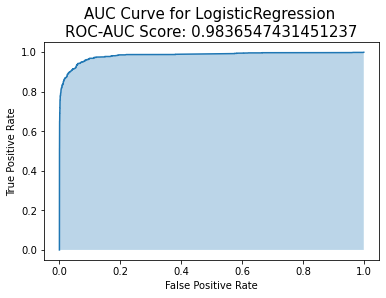


Model training and testing completed

Function End Reached


In [219]:
build_baseline_model(LogisticRegression(),xtrain,ytrain,xtest,ytest,num_cols=nums)

### K Neighbors Classifier

2021-10-04 08:37:34 INFO-Training KNeighborsClassifier Model complete
2021-10-04 08:37:34 INFO-Training KNeighborsClassifier Model complete
2021-10-04 08:37:34 INFO-Training KNeighborsClassifier Model complete
2021-10-04 08:37:34 INFO-Training KNeighborsClassifier Model complete


Model Performance - KNeighborsClassifier
Train Result:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     31620
           1       0.98      0.93      0.96      7905

    accuracy                           0.98     39525
   macro avg       0.98      0.96      0.97     39525
weighted avg       0.98      0.98      0.98     39525


Average f1 Score: 0.9344049185703934
Average Std in F1 score: 0.0020093650578765975

Test Result:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     13552
           1       0.97      0.91      0.94      3388

    accuracy                           0.98     16940
   macro avg       0.97      0.95      0.96     16940
weighted avg       0.98      0.98      0.98     16940



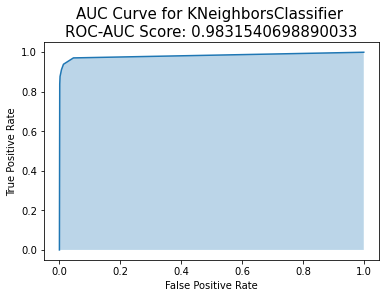


Model training and testing completed

Function End Reached


In [220]:
build_baseline_model(KNeighborsClassifier(),xtrain,ytrain,xtest,ytest,num_cols=nums,scaling=True)

### Decision Tree

2021-10-04 08:37:54 INFO-Training DecisionTreeClassifier(random_state=0) Model complete
2021-10-04 08:37:54 INFO-Training DecisionTreeClassifier(random_state=0) Model complete
2021-10-04 08:37:54 INFO-Training DecisionTreeClassifier(random_state=0) Model complete
2021-10-04 08:37:54 INFO-Training DecisionTreeClassifier(random_state=0) Model complete


Model Performance - DecisionTreeClassifier(random_state=0)
Train Result:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     31620
           1       0.99      0.94      0.97      7905

    accuracy                           0.99     39525
   macro avg       0.99      0.97      0.98     39525
weighted avg       0.99      0.99      0.99     39525


Average f1 Score: 0.9456713118113521
Average Std in F1 score: 0.003544866508632765

Test Result:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     13552
           1       0.99      0.91      0.95      3388

    accuracy                           0.98     16940
   macro avg       0.98      0.95      0.97     16940
weighted avg       0.98      0.98      0.98     16940



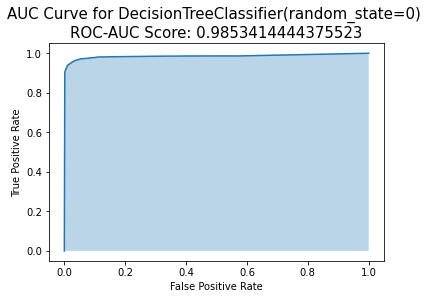


Model training and testing completed

Function End Reached


In [221]:
build_baseline_model(DecisionTreeClassifier(random_state=0),xtrain,ytrain,xtest,ytest,num_cols=nums)

### Support Vector Machine

2021-10-04 08:39:29 INFO-Training SVC(probability=True) Model complete
2021-10-04 08:39:29 INFO-Training SVC(probability=True) Model complete
2021-10-04 08:39:29 INFO-Training SVC(probability=True) Model complete
2021-10-04 08:39:29 INFO-Training SVC(probability=True) Model complete


Model Performance - SVC(probability=True)
Train Result:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     31620
           1       0.96      0.88      0.92      7905

    accuracy                           0.97     39525
   macro avg       0.97      0.94      0.95     39525
weighted avg       0.97      0.97      0.97     39525


Average f1 Score: 0.9172595674815912
Average Std in F1 score: 0.0026264672035209804

Test Result:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     13552
           1       0.96      0.88      0.92      3388

    accuracy                           0.97     16940
   macro avg       0.96      0.93      0.95     16940
weighted avg       0.97      0.97      0.97     16940



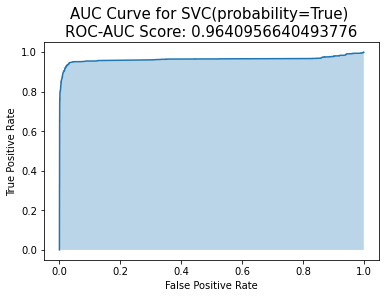


Model training and testing completed

Function End Reached


In [222]:
build_baseline_model(SVC(probability=True),xtrain,ytrain,xtest,ytest,num_cols=nums)

### Random Forest Classifier

2021-10-04 08:41:35 INFO-Training RandomForestClassifier(random_state=0) Model complete
2021-10-04 08:41:35 INFO-Training RandomForestClassifier(random_state=0) Model complete
2021-10-04 08:41:35 INFO-Training RandomForestClassifier(random_state=0) Model complete
2021-10-04 08:41:35 INFO-Training RandomForestClassifier(random_state=0) Model complete


Model Performance - RandomForestClassifier(random_state=0)
Train Result:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     31620
           1       0.99      0.95      0.97      7905

    accuracy                           0.99     39525
   macro avg       0.99      0.97      0.98     39525
weighted avg       0.99      0.99      0.99     39525


Average f1 Score: 0.9514922313474065
Average Std in F1 score: 0.0023460279914436014

Test Result:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     13552
           1       0.98      0.93      0.95      3388

    accuracy                           0.98     16940
   macro avg       0.98      0.96      0.97     16940
weighted avg       0.98      0.98      0.98     16940



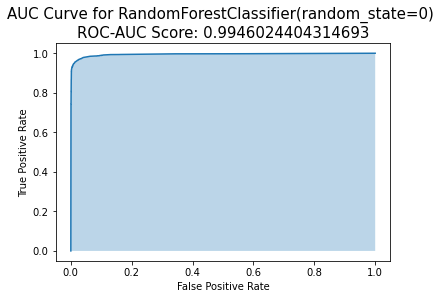


Model training and testing completed

Function End Reached


In [223]:
build_baseline_model(RandomForestClassifier(random_state=0),xtrain,ytrain,xtest,ytest,num_cols=nums)

### Ada Boost Classifier

2021-10-04 08:41:42 INFO-Training AdaBoostClassifier(random_state=0) Model complete
2021-10-04 08:41:42 INFO-Training AdaBoostClassifier(random_state=0) Model complete
2021-10-04 08:41:42 INFO-Training AdaBoostClassifier(random_state=0) Model complete
2021-10-04 08:41:42 INFO-Training AdaBoostClassifier(random_state=0) Model complete


Model Performance - AdaBoostClassifier(random_state=0)
Train Result:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     31620
           1       0.94      0.89      0.92      7905

    accuracy                           0.97     39525
   macro avg       0.96      0.94      0.95     39525
weighted avg       0.97      0.97      0.97     39525


Average f1 Score: 0.9168103999299508
Average Std in F1 score: 0.004832387417025825

Test Result:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     13552
           1       0.94      0.89      0.91      3388

    accuracy                           0.97     16940
   macro avg       0.96      0.94      0.95     16940
weighted avg       0.97      0.97      0.97     16940



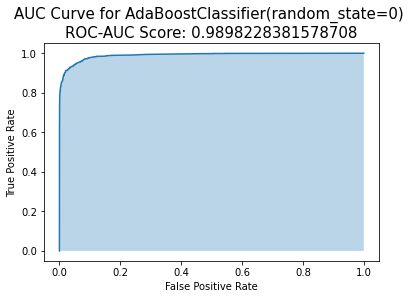


Model training and testing completed

Function End Reached


In [224]:
build_baseline_model(AdaBoostClassifier(random_state=0),xtrain,ytrain,xtest,ytest,num_cols=nums)

### Gradient Boosting Classifier

2021-10-04 08:41:47 INFO-Training GradientBoostingClassifier(random_state=0) Model complete
2021-10-04 08:41:47 INFO-Training GradientBoostingClassifier(random_state=0) Model complete
2021-10-04 08:41:47 INFO-Training GradientBoostingClassifier(random_state=0) Model complete
2021-10-04 08:41:47 INFO-Training GradientBoostingClassifier(random_state=0) Model complete


Model Performance - GradientBoostingClassifier(random_state=0)
Train Result:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     31620
           1       0.96      0.91      0.93      7905

    accuracy                           0.97     39525
   macro avg       0.97      0.95      0.96     39525
weighted avg       0.97      0.97      0.97     39525


Average f1 Score: 0.9313836156372112
Average Std in F1 score: 0.0018065136545790646

Test Result:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     13552
           1       0.96      0.90      0.93      3388

    accuracy                           0.97     16940
   macro avg       0.97      0.95      0.96     16940
weighted avg       0.97      0.97      0.97     16940



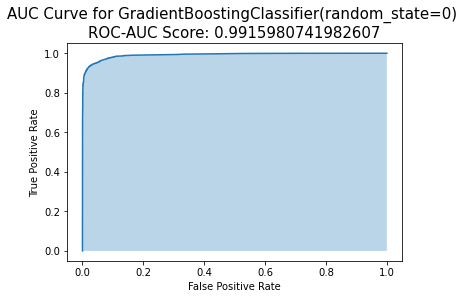


Model training and testing completed

Function End Reached


In [225]:
build_baseline_model(GradientBoostingClassifier(random_state=0),xtrain,ytrain,xtest,ytest,num_cols=nums)

### XGB Classifier

[08:41:52] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


2021-10-04 08:41:54 INFO-Training XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None) Model complete
2021-10-04 08:41:54 INFO-Training XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_dept

[08:41:54] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:41:55] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:41:57] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model Performance - XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
  

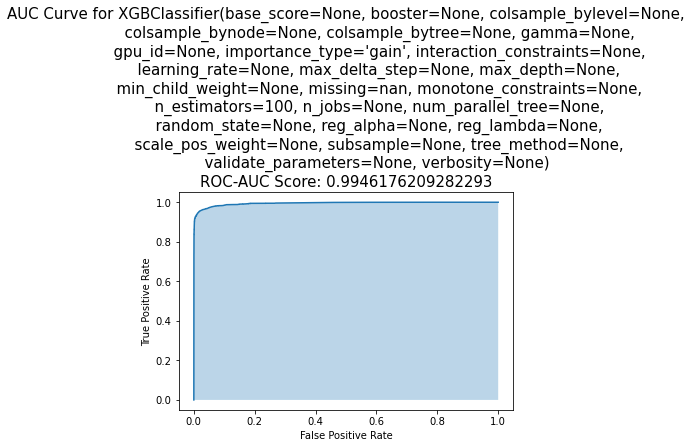


Model training and testing completed

Function End Reached


In [226]:
build_baseline_model(XGBClassifier(),xtrain,ytrain,xtest,ytest,num_cols=nums)

In [227]:
baseline_results.dropna(inplace=True)
baseline_results

,Model,Train F1 score,Test F1,ROC-AUC,CV F1 average,CV F1 std average,Model Latency for 1 unit
1,LogisticRegression,0.899183,0.893860,0.983655,0.899652,0.004315,0.000512
2,KNeighborsClassifier,0.955115,0.940639,0.983154,0.934405,0.002009,0.002590
3,DecisionTreeClassifier(random_state=0),0.968340,0.947707,0.985341,0.945671,0.003545,0.000499
4,SVC(probability=True),0.921131,0.915061,0.964096,0.917260,0.002626,0.000940
5,RandomForestClassifier(random_state=0),0.968484,0.954587,0.994602,0.951492,0.002346,0.014952
6,AdaBoostClassifier(random_state=0),0.916341,0.914095,0.989823,0.916810,0.004832,0.009895
7,GradientBoostingClassifier(random_state=0),0.933299,0.929814,0.991598,0.931384,0.001807,0.000830
8,"XGBClassifier(base_score=None, booster=None, c...",0.961533,0.951730,0.994618,0.946935,0.005028,0.002475


Inferences - 

- Based on the analysis of f1 scores, cross validation and model latency for several models, we will decide which model to choose for further tuning.
- In terms of F1 scores across train and test, XGB Classifier, Random Forest Classifier and K Nearest Neighbors are providing scores around 0.94-0.96, with Random Forest Providing the best result on test i.e 0.954
- In terms of Area Under Curve scores, XGB Classifier, Gradient Boosting and Random Forest Classifier are providing scores aroud 0.99, with XGB Classifier and Random Forest with identical scores of 0.994.
- In terms of cross validation, Random Forest Provides the best result across the 3 training samples i.e 0.95. However,Gradient Boosting classifier provides the lowest deviation in f1 scores i.e 0.001807. Amongst other ensemble techniques,Random Forest provides the lowest deviation i.e 0.0023.
- In terms of latency i.e amount of time model takes to make a prediction for a given input, single estimators like Decision Tree, Logistic regression and Support Vector take the lowest time.
- Random Forest takes the highest amount of time. However, using feature selection and parameter tuning, we can reduce latency time.
- Based on comparisons, we can see that Random Forest is the best performer and hence, we will choose Random Forest for further tuning

## Feature Selection

In [228]:
! pip install mlxtend

In [229]:
from sklearn.feature_selection import RFECV
from mlxtend.feature_selection import SequentialFeatureSelector

In [230]:
baseline_best_features = pd.DataFrame({"Model":None,"Train F1 score":None,"Test F1":None,"Test Recall":None,"CV Recall average":None,"CV Recall std average":None,"Model Latency for 1 unit in seconds":None},index=range(1))

In [231]:
def build_feature_selection_model(model_estimator,feature_selector_estimator,x_training,y_training,x_testing,y_testing,scaling=False,num_cols=None):
    
    """
    Creates a ML Model for given model_estimator and train sample and tests on test sample. Performs cross validation too. Uses f1 score for evaluation.
    
    Note - It is assumed that missing values treatment, outlier treatment, transformation and encoding have already been performed.
    
    Also, if unknown technique passed or no technique passed, default technique used is feature importance
    Arguments - 
    
    1. num_cols : A list of numerical features in the dataset. If not passed, function will try to find numerical features
    
    """
    if str(f"{model_estimator}").replace("()","") == "XGBClassifier":
        model_str = "XGBClassifier"
    else:
        model_str = str(f"{model_estimator}").replace("()","")
        
    
    if str(f"{feature_selector_estimator}").split("(")[0] != "TOP10FeatureImportances":
        feature_selector_estimator_str = str(f"{feature_selector_estimator}").split("(")[0]
    else:
        feature_selector_estimator_str = "TOP10FeatureImportances"
    
    if num_cols == None:
        nums_cols = list(x_training.select_dtypes(include=np.object).columns)
    
    if scaling == True:
        from sklearn.preprocessing import StandardScaler
        SC = StandardScaler().fit(x_training[list(num_cols)])
        x_training[list(nums)] = SC.transform(x_training[list(num_cols)])
        x_testing[list(nums)] = SC.transform(x_testing[list(num_cols)])
    
    
    try:
        
        # Finding best features
        
        if feature_selector_estimator_str == "SequentialFeatureSelector":
            SFS = SequentialFeatureSelector(model_estimator,k_features="best",cv=3,scoring="recall",forward=False).fit(x_training,y_training)
            logger.info("Performing Forward Feature Elimination")
            top_features = list(SFS.k_feature_names_)
                
        elif feature_selector_estimator_str == "RFECV":
            RFE = RFECV(RandomForestClassifier(random_state=0),min_features_to_select=10,cv=3,scoring="recall").fit(x_training,y_training)
            logger.info("Performing Recursive Feature Elimination")
            top_features = list(x_training.columns[RFE.ranking_==1])
                
        elif feature_selector_estimator_str == "TOP10FeatureImportances":
            print("Since no feature selector technique chosen or unknown selection technique chosen, top 10 features from Feature Importances will be chosen")
            model = model_estimator.fit(x_training,y_training)
            importances = pd.DataFrame({"Feature":x_training.columns,"Importances":model.feature_importances_})
            importances.sort_values(by="Importances",ascending=False,inplace=True)
            logger.info("Calculating Feature Importances")
            top_features = importances.iloc[:10,0].tolist()
            
        ## Training the model and calculating f1 scores on train and test along with cross validation scores
        
        model = model_estimator.fit(x_training[top_features],y_training)
        train_pred = model.predict(x_training[top_features])
        logger.info(f"Training {model_str} with {feature_selector_estimator_str} Model complete")
        test_pred = model.predict(x_testing[top_features])
        cv = cross_val_score(model_estimator,x_training[top_features],y_training,scoring="recall",cv=3)
        train_f1 = f1_score(y_training,train_pred)
        test_f1 = f1_score(y_testing,test_pred)
        recall = recall_score(ytest,test_pred)
        cv_mean = cv.mean()
        cv_std = cv.std()

        ## Model Latency for 1 unit in seconds
        start = datetime.datetime.now()
        model.predict(x_training[top_features].iloc[0].values.reshape(1,-1))
        end = datetime.datetime.now()
        latency = (end.microsecond - start.microsecond) / 1000000
    

        ## Calculating ROC AUC Score
        test_pred_prob = model.predict_proba(x_testing[top_features])[:,1]
        roc = roc_auc_score(y_testing,test_pred_prob)

    
        ## Appending results to model performance table
    
        try:
            global baseline_best_features
    
            baseline_best_features = baseline_best_features.append({"Model":f"{model_str} - {feature_selector_estimator_str}","Train F1 score":train_f1,"Test F1":test_f1,"Test Recall":recall,"CV Recall average":cv_mean,"CV Recall std average":cv_std,"Model Latency for 1 unit in seconds":latency},ignore_index=True)
        except NameError:
            print("Baseline best features results table not defined")
    
        ## Displaying results
        print(f"Model Performance - {model_str} with features from {feature_selector_estimator_str}")
    
        print("Train Result:",classification_report(y_training,train_pred),sep="\n")
        print()
        print(f"Average recall Score: {cv_mean}",f"Average Std in recalls score: {cv_std}",sep="\n")
        print()
        print("Test Result:",classification_report(y_testing,test_pred),sep="\n")

        fpr,tpr,thres = roc_curve(y_testing,test_pred_prob)
        plt.plot(fpr,tpr)
        plt.fill_between(fpr,tpr,alpha=0.3)
        plt.title(f"AUC Curve for {model_str} \nROC-AUC Score: {roc}",size=15)
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.show()
        
        plt.figure(figsize = (6,5))
        sns.heatmap(confusion_matrix(y_testing,test_pred),annot=True,cbar=False,fmt="g")
        plt.xlabel("Predicted Labels")
        plt.ylabel("Actual Labels")
        plt.xticks([0.5,1.5],["Non Backorders","Backorders"])
        plt.yticks([0.5,1.5],["Non Backorders","Backorders"])
        plt.title(f"CONFUSION MATRIX for {model_str} with {feature_selector_estimator_str}")
        plt.show()
        
        print("","Model training and testing completed","",sep="\n")
        
    except NameError:
        print("Either the model_estimator or one or more of the samples are not defined or loaded")
        logging.error(f"Either the {model_str} model_estimator, {feature_selector_estimator_str} or one or more of the samples are not defined or loaded")
    except AttributeError:
        print("Model has no feature importance attribute")
        logging.error(f"{model_str} has no feature importance attribute")
    else:
        print("Function End Reached")
        
    return top_features

### Backward Feature Elimination

2021-10-04 08:50:25 INFO-Performing Forward Feature Elimination
2021-10-04 08:50:25 INFO-Performing Forward Feature Elimination
2021-10-04 08:50:25 INFO-Performing Forward Feature Elimination
2021-10-04 08:50:25 INFO-Performing Forward Feature Elimination
2021-10-04 08:50:28 INFO-Training RandomForestClassifier(random_state=0) with SequentialFeatureSelector Model complete
2021-10-04 08:50:28 INFO-Training RandomForestClassifier(random_state=0) with SequentialFeatureSelector Model complete
2021-10-04 08:50:28 INFO-Training RandomForestClassifier(random_state=0) with SequentialFeatureSelector Model complete
2021-10-04 08:50:28 INFO-Training RandomForestClassifier(random_state=0) with SequentialFeatureSelector Model complete


Model Performance - RandomForestClassifier(random_state=0) with features from SequentialFeatureSelector
Train Result:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     31620
           1       0.99      0.95      0.97      7905

    accuracy                           0.99     39525
   macro avg       0.99      0.97      0.98     39525
weighted avg       0.99      0.99      0.99     39525


Average recall Score: 0.9302972802024035
Average Std in recalls score: 0.0036180517763630586

Test Result:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     13552
           1       0.98      0.93      0.95      3388

    accuracy                           0.98     16940
   macro avg       0.98      0.96      0.97     16940
weighted avg       0.98      0.98      0.98     16940



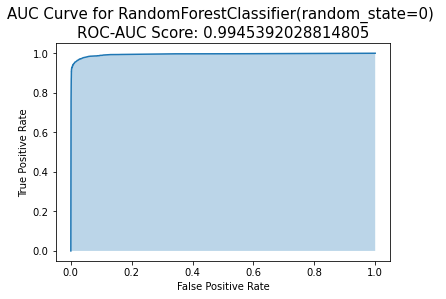

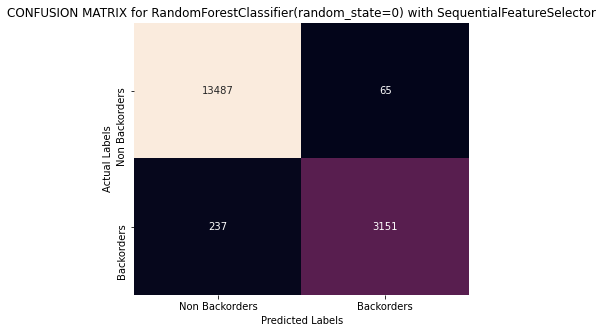


Model training and testing completed

Function End Reached


In [232]:
sfs = build_feature_selection_model(RandomForestClassifier(random_state=0),SequentialFeatureSelector(RandomForestClassifier(random_state=0),forward=False,k_features="best",cv=3,scoring="recall"),xtrain,ytrain,xtest,ytest)

In [233]:
sfs

['national_inv',
 'lead_time',
 'in_transit_qty',
 'forecast_6_month',
 'sales_6_month',
 'min_bank',
 'pieces_past_due',
 'perf_6_month_avg',
 'local_bo_qty',
 'x1_Yes',
 'x2_Yes',
 'x3_Yes',
 'x4_Yes']

### Recursive Feature Elimination

2021-10-04 08:51:04 INFO-Performing Recursive Feature Elimination
2021-10-04 08:51:04 INFO-Performing Recursive Feature Elimination
2021-10-04 08:51:04 INFO-Performing Recursive Feature Elimination
2021-10-04 08:51:04 INFO-Performing Recursive Feature Elimination
2021-10-04 08:51:06 INFO-Training RandomForestClassifier(random_state=0) with RFECV Model complete
2021-10-04 08:51:06 INFO-Training RandomForestClassifier(random_state=0) with RFECV Model complete
2021-10-04 08:51:06 INFO-Training RandomForestClassifier(random_state=0) with RFECV Model complete
2021-10-04 08:51:06 INFO-Training RandomForestClassifier(random_state=0) with RFECV Model complete


Model Performance - RandomForestClassifier(random_state=0) with features from RFECV
Train Result:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     31620
           1       0.99      0.95      0.97      7905

    accuracy                           0.99     39525
   macro avg       0.99      0.97      0.98     39525
weighted avg       0.99      0.99      0.99     39525


Average recall Score: 0.9299177735610374
Average Std in recalls score: 0.002176426380023456

Test Result:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     13552
           1       0.98      0.93      0.95      3388

    accuracy                           0.98     16940
   macro avg       0.98      0.96      0.97     16940
weighted avg       0.98      0.98      0.98     16940



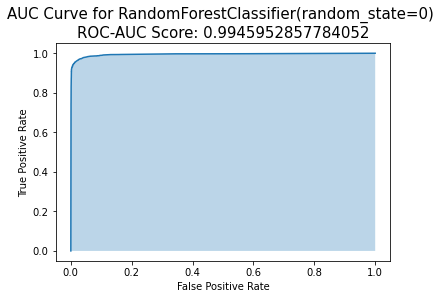

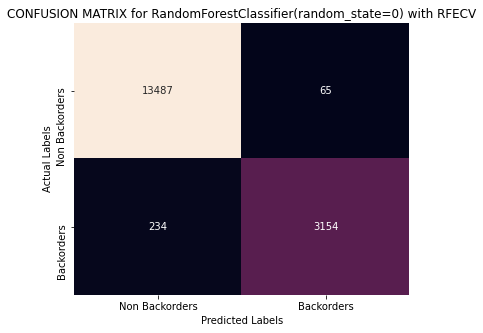


Model training and testing completed

Function End Reached


In [234]:
rfe = build_feature_selection_model(RandomForestClassifier(random_state=0),RFECV(RandomForestClassifier(random_state=0),min_features_to_select=10,cv=3,scoring="recall"),xtrain,ytrain,xtest,ytest)

In [235]:
rfe

['national_inv',
 'lead_time',
 'in_transit_qty',
 'forecast_6_month',
 'sales_6_month',
 'min_bank',
 'pieces_past_due',
 'perf_6_month_avg',
 'local_bo_qty',
 'x0_Yes',
 'x1_Yes',
 'x2_Yes',
 'x3_Yes',
 'x4_Yes']

### TOP 10 Feature Importances

Since no feature selector technique chosen or unknown selection technique chosen, top 10 features from Feature Importances will be chosen


2021-10-04 08:51:13 INFO-Calculating Feature Importances
2021-10-04 08:51:13 INFO-Calculating Feature Importances
2021-10-04 08:51:13 INFO-Calculating Feature Importances
2021-10-04 08:51:13 INFO-Calculating Feature Importances
2021-10-04 08:51:16 INFO-Training RandomForestClassifier(random_state=0) with TOP10FeatureImportances Model complete
2021-10-04 08:51:16 INFO-Training RandomForestClassifier(random_state=0) with TOP10FeatureImportances Model complete
2021-10-04 08:51:16 INFO-Training RandomForestClassifier(random_state=0) with TOP10FeatureImportances Model complete
2021-10-04 08:51:16 INFO-Training RandomForestClassifier(random_state=0) with TOP10FeatureImportances Model complete


Model Performance - RandomForestClassifier(random_state=0) with features from TOP10FeatureImportances
Train Result:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     31620
           1       0.99      0.95      0.97      7905

    accuracy                           0.99     39525
   macro avg       0.99      0.97      0.98     39525
weighted avg       0.99      0.99      0.99     39525


Average recall Score: 0.9283997469955724
Average Std in recalls score: 0.0028116522164317427

Test Result:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     13552
           1       0.98      0.93      0.95      3388

    accuracy                           0.98     16940
   macro avg       0.98      0.96      0.97     16940
weighted avg       0.98      0.98      0.98     16940



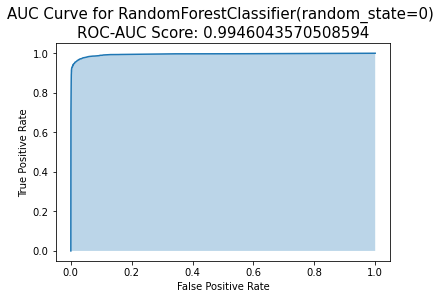

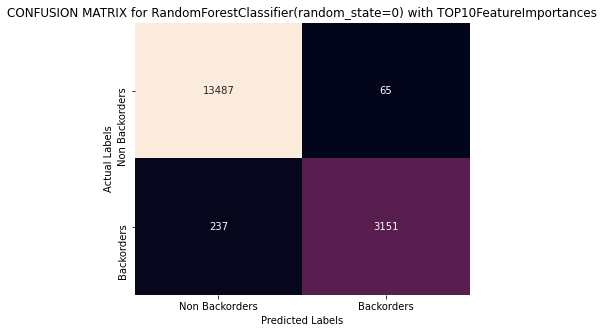


Model training and testing completed

Function End Reached


In [236]:
top10 = build_feature_selection_model(RandomForestClassifier(random_state=0),feature_selector_estimator="TOP10FeatureImportances",x_training=xtrain,y_training=ytrain,x_testing=xtest,y_testing=ytest)

In [237]:
top10

['sales_6_month',
 'forecast_6_month',
 'min_bank',
 'perf_6_month_avg',
 'lead_time',
 'national_inv',
 'in_transit_qty',
 'x1_Yes',
 'local_bo_qty',
 'x3_Yes']

In [238]:
baseline_best_features.dropna(inplace=True)
baseline_best_features

,Model,Train F1 score,Test F1,Test Recall,CV Recall average,CV Recall std average,Model Latency for 1 unit in seconds
1,RandomForestClassifier(random_state=0) - Seque...,0.968484,0.954270,0.930047,0.930297,0.003618,0.01621
2,RandomForestClassifier(random_state=0) - RFECV,0.968484,0.954745,0.930933,0.929918,0.002176,0.01624
3,RandomForestClassifier(random_state=0) - TOP10...,0.968217,0.954270,0.930047,0.928400,0.002812,0.01648


#### Observations - 

- We applied the backward feature elimination, recursive feature elimination and feature importance technique using Random Forest.

- On comparing the f1 scores on train and test, recall on test, cross validation and model latency, we can conclude that while test f1 and recall scores are same for all methods, the f1 scores and cross validation recall score for RFE is the best across all models.

- Across all models, despite using lesser or optimum no. of features, the models are taking more time to make a prediction.

- The latency of Random Forest using the top 10 features, compared to the other models using RFE and SFS, is slightly higher.

- However, in terms of interpretation and user interface, using top 10 features is easy as it uses lesser no. of features.

- Also the model using the top 10 features has the lowest deviation in cross validation recalls. 

- Also, categorical features from the top 10 can be easily understood as compared to the other models. Other categorical features have no proper explanation, hence making it difficult for users to answer. The categorical features suggested by feature importances and can be interpretated.

- Also, Hence, we will use Random Forest Classifier with top 10 features. We will try to tune the model to reduce latency.

## Grid Search / Random Search

In [253]:
params = {"n_estimators":[20,40,60,80],"max_depth":range(3,11),"criterion":["gini","entropy"],"min_samples_leaf":[20,30,40,50],"min_samples_split":[60,50,40]}

In [254]:
logger.info("Hyperparameter Tuning started using Grid Search")
grid = GridSearchCV(RandomForestClassifier(random_state=0),params,cv=3,scoring="recall").fit(xtrain[top10],ytrain)

2021-10-04 09:38:01 INFO-Hyperparameter Tuning started using Grid Search
2021-10-04 09:38:01 INFO-Hyperparameter Tuning started using Grid Search
2021-10-04 09:38:01 INFO-Hyperparameter Tuning started using Grid Search
2021-10-04 09:38:01 INFO-Hyperparameter Tuning started using Grid Search


In [255]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 20,
 'min_samples_split': 50,
 'n_estimators': 60}

In [256]:
best_params = {"criterion":"entropy",'max_depth': 10, 'n_estimators': 60,"min_samples_leaf":20,"min_samples_split":50}
best_params

{'criterion': 'entropy',
 'max_depth': 10,
 'n_estimators': 60,
 'min_samples_leaf': 20,
 'min_samples_split': 50}

In [39]:
pickle.dump(best_params,open("best_params.pkl","wb"))

2021-10-04 09:59:27 INFO-Training tuned rf classifier with importances features
2021-10-04 09:59:27 INFO-Training tuned rf classifier with importances features
2021-10-04 09:59:27 INFO-Training tuned rf classifier with importances features
2021-10-04 09:59:27 INFO-Training tuned rf classifier with importances features


Train Result:
Latency: 0.01158
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     31620
           1       0.97      0.90      0.93      7905

    accuracy                           0.97     39525
   macro avg       0.97      0.95      0.96     39525
weighted avg       0.97      0.97      0.97     39525


Average Recall Score: 0.8958087367178277
Average Std in recall score: 0.005132311897558682

Test Result:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     13552
           1       0.96      0.90      0.93      3388

    accuracy                           0.97     16940
   macro avg       0.97      0.94      0.96     16940
weighted avg       0.97      0.97      0.97     16940



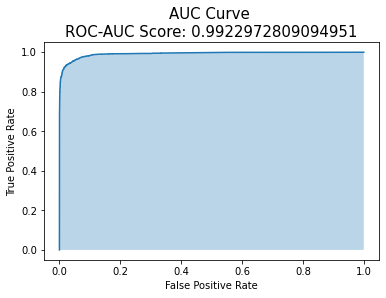

In [257]:
tuned_rf_importances = RandomForestClassifier(max_depth=10,n_estimators = 60,random_state=0,criterion="entropy",min_samples_leaf=20,min_samples_split=50).fit(xtrain[top10],ytrain)
logger.info("Training tuned rf classifier with importances features")
tuned_rf_importances_train_pred = tuned_rf_importances.predict(xtrain[top10])
tuned_rf_importances_test_pred = tuned_rf_importances.predict(xtest[top10])
tuned_rf_importances_cv = cross_val_score(RandomForestClassifier(max_depth=10,n_estimators = 60,random_state=0,criterion="entropy",min_samples_leaf=20,min_samples_split=50),xtrain[top10],ytrain,scoring="recall",cv=3)
tuned_rf_importances_train_f1 = f1_score(ytrain,tuned_rf_importances_train_pred)
tuned_rf_importances_test_f1 = f1_score(ytest,tuned_rf_importances_test_pred)
tuned_rf_importances_recall = recall_score(ytest,tuned_rf_importances_test_pred)
tuned_rf_importances_cv_mean = tuned_rf_importances_cv.mean()
tuned_rf_importances_cv_std = tuned_rf_importances_cv.std()

## Model Latency for 1 unit
start = datetime.datetime.now()
tuned_rf_importances.predict(xtrain[top10].iloc[0].values.reshape(1,-1))
end = datetime.datetime.now()
latency = (end.microsecond - start.microsecond) / 1000000


print("Train Result:",f"Latency: {latency}",classification_report(ytrain,tuned_rf_importances_train_pred),sep="\n")
print()
print(f"Average Recall Score: {tuned_rf_importances_recall}",f"Average Std in recall score: {tuned_rf_importances_cv_std}",sep="\n")
print()
print("Test Result:",classification_report(ytest,tuned_rf_importances_test_pred),sep="\n")

tuned_rf_importances_test_pred_prob = tuned_rf_importances.predict_proba(xtest[top10])[:,1]
tuned_rf_importances_roc = roc_auc_score(ytest,tuned_rf_importances_test_pred_prob)
fpr,tpr,thres = roc_curve(ytest,tuned_rf_importances_test_pred_prob)
plt.plot(fpr,tpr)
plt.fill_between(fpr,tpr,alpha=0.3)
plt.title(f"AUC Curve \nROC-AUC Score: {tuned_rf_importances_roc}",size=15)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

#### Observations - 

- On tuning the Random Forest with top 10 features, the performance of the model dropped slightly indicated by the lower ROC-AUC Score, lower recall, lower f1 train and test scores.
- Also, from the roc-auc curve, we can see that the roc-auc score has dropped to 0.9922 from 0.994.
- While the recall on test has remained same, we can see higher deviation in recall scores during cross validation have increased from 0.0028 to 0.0055 and average recall has dropped from approx 0.93 to 0.90.
- Though latency has reduced by from 0.015 to 0.011 however, performances have reduced.
- We cannot afford too much compromise on performance for few microseconds as increased false negatives might cause a business to lose potential customers and sales and hence we will continue using the baseline random forest model with top 10 features.

In [258]:
model = RandomForestClassifier(random_state=0).fit(xtrain[top10],ytrain)

pickle.dump(model,open("rf_importances.pkl","wb"))

In [259]:
pickle.dump(top10,open("Final_Features.pkl","wb"))